In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.style
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('Sparkling.csv')
df.head(5)

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [13]:
#Creating the Time Stamps and adding to the data frame to make it a Time Series Data
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [15]:
#Creating the combined Dataframe
df = pd.DataFrame({'YearMonth':date,
                   'Sparkling':df_spark.Sparkling,})
df.set_index('YearMonth',inplace=True)

In [16]:
df.tail(5)

Sparkling
YearMonth            
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [17]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [18]:
df.isnull().sum()

Sparkling    0
dtype: int64

Text(0, 0.5, 'Units Sold')

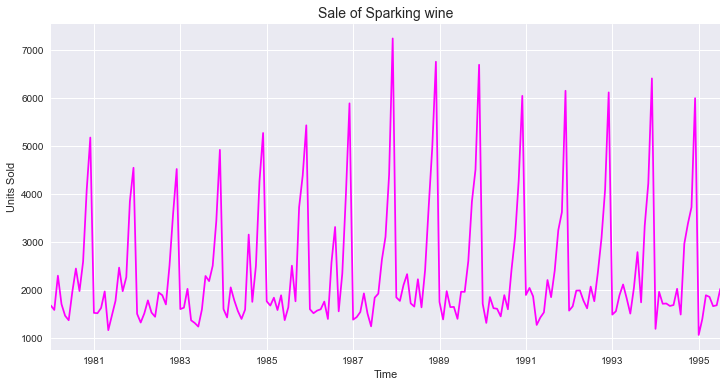

In [20]:
plt.figure(figsize = (12, 6))
df.Sparkling.plot(color='magenta')
plt.title('Sale of Sparking wine', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

In [21]:
df['1994']

Sparkling
YearMonth            
1994-01-31       1197
1994-02-28       1968
1994-03-31       1720
1994-04-30       1725
1994-05-31       1674
1994-06-30       1693
1994-07-31       2031
1994-08-31       1495
1994-09-30       2968
1994-10-31       3385
1994-11-30       3729
1994-12-31       5999

Text(0, 0.5, 'Distribution')

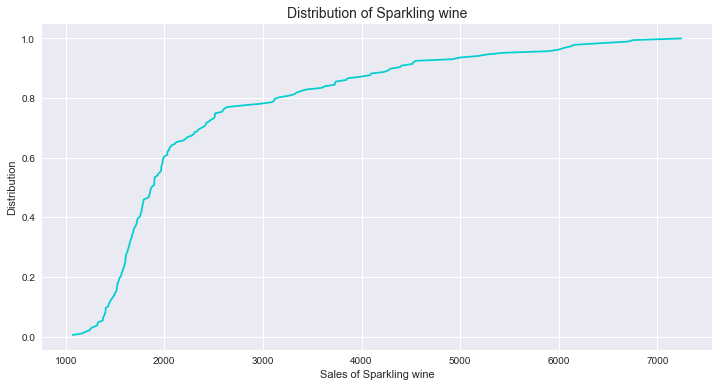

In [22]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (12, 6))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = 'darkturquoise')
plt.title('Distribution of Sparkling wine', fontsize=14)
plt.xlabel('Sales of Sparkling wine')
plt.ylabel('Distribution')

In [ ]:
boxplot

Text(0.5, 1.0, 'Yearly Boxplot - Sparkling')

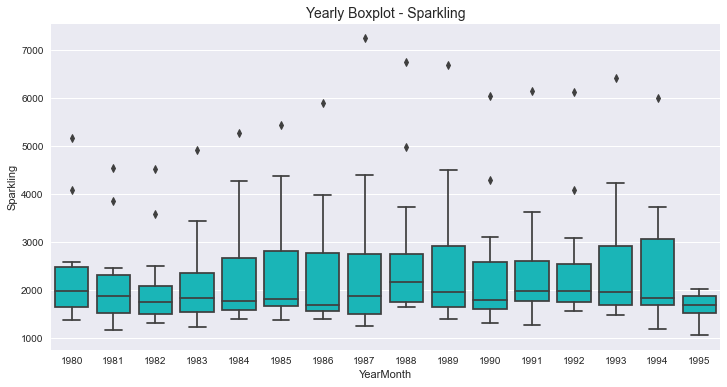

In [23]:
#Yearly Boxplot - Sparkling
plt.figure(figsize = (12, 6))
sns.boxplot(x = df.index.year,y = df['Sparkling'], color = 'darkturquoise')
plt.title('Yearly Boxplot - Sparkling', fontsize=14)

Text(0.5, 1.0, 'Monthly Boxplot - Sparkling')

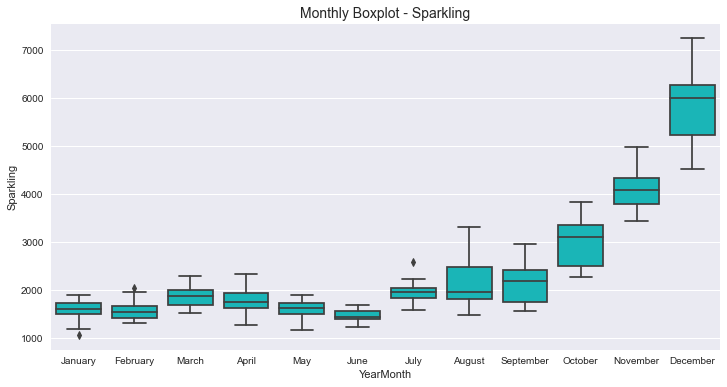

In [24]:
#Monthly Plot - Sparkling
plt.figure(figsize = (12, 6))
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'], color = 'darkturquoise')
plt.title('Monthly Boxplot - Sparkling', fontsize=14)

In [ ]:
#Plot a time series monthplot to understand the spread of sales across different years and within different months across years.

Text(0.5, 1.0, 'Sparkling - Monthly plot')

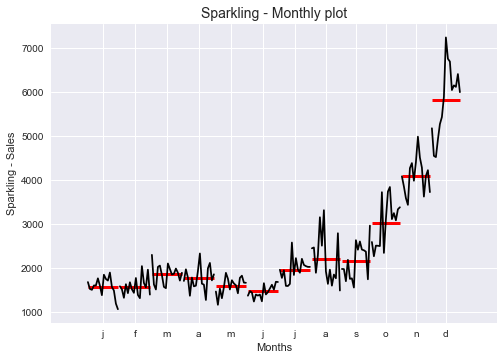

In [25]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df['Sparkling'],ylabel='Sparkling - Sales')
plt.xlabel('Months')
plt.title('Sparkling - Monthly plot', fontsize = 14)

In [ ]:
#Plot a graph of monthly sales across years.

In [26]:
#Sparkling
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

Text(0.5, 1.0, 'Sparkling - Monthly sales over years')

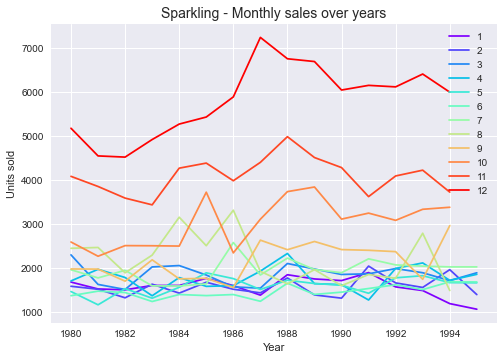

In [27]:
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Units sold')
plt.xlabel('Year')
plt.title('Sparkling - Monthly sales over years', fontsize=14)

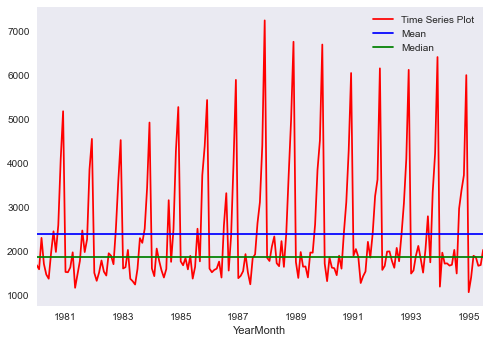

In [39]:
df.plot(color='Red')
plt.axhline(df['Sparkling'].mean(),color='Blue')
plt.axhline(df['Sparkling'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

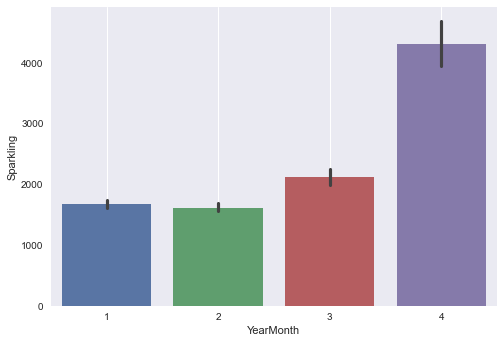

In [41]:
sns.barplot(df.index.quarter,df.Sparkling,data=df)
plt.grid();

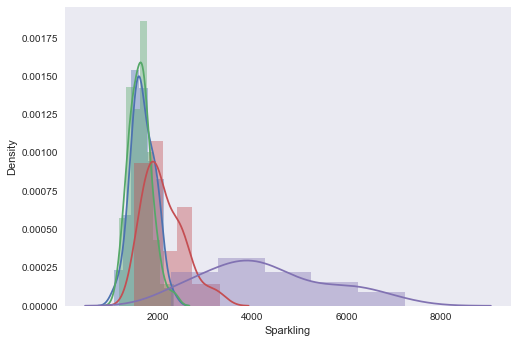

In [43]:
sns.distplot(df.loc[df.index.quarter == 1]['Sparkling'])
sns.distplot(df.loc[df.index.quarter == 2]['Sparkling'])
sns.distplot(df.loc[df.index.quarter == 3]['Sparkling'])
sns.distplot(df.loc[df.index.quarter == 4]['Sparkling'])
plt.grid();

In [ ]:
#Plot the average sales per month and the month on month percentage change of sales.

NameError: name 'pct_change_r' is not defined

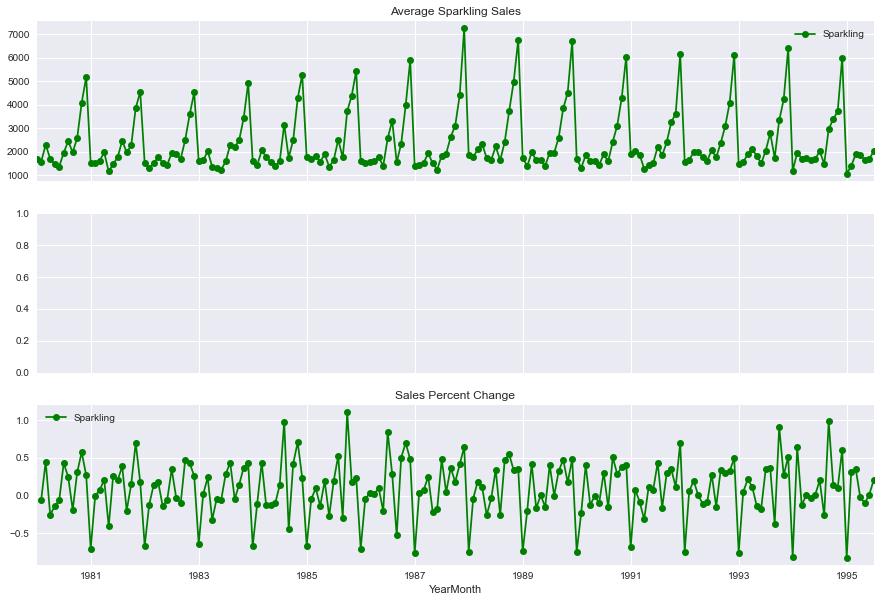

In [29]:
# group by date and get average Sparkling & Rose sales, and precent change
average_s    = df.groupby(df.index)['Sparkling'].mean()

pct_change_s = df.groupby(df.index)['Sparkling'].sum().pct_change()


fig, (axis1,axis2,axis3) = plt.subplots(3,1,sharex=True,figsize=(15,10))

# plot average Sparkling sales over time(year-month)
ax1 = average_s.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales", color = 'green')
#ax1.set_xticks(range(len(average)))
#ax1.set_xticklabels(average.index.tolist())

# plot precent change for Sales over time(year-month)
ax3 = pct_change_s.plot(legend=True,ax=axis3,marker='o',color='green',title="Sales Percent Change")
ax3 = pct_change_r.plot(legend=True,ax=axis3,marker='o',color='magenta',title="Sales Percent Change")
plt.xlabel('Time')
plt.legend(loc='best');

In [ ]:
additive decompose

In [31]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

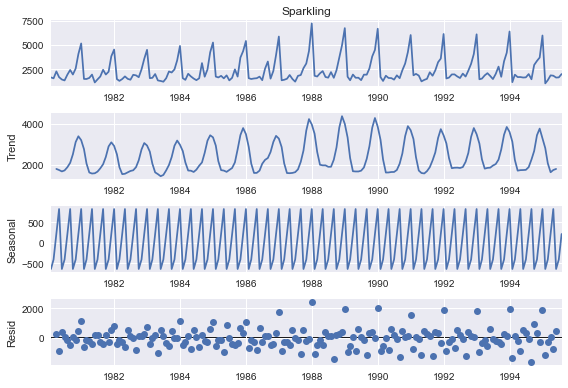

In [32]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive', freq=4)
decomposition.plot();

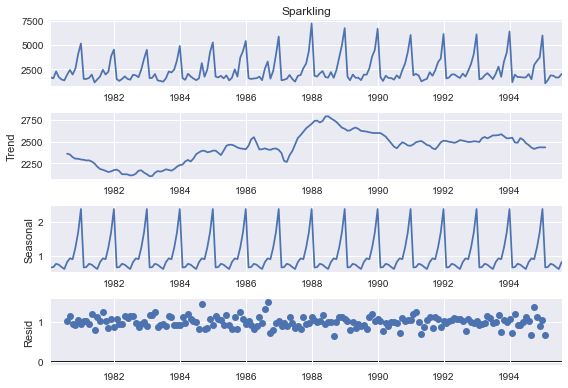

In [33]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [34]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: resi

In [35]:
detrend_ts = seasonality + residual
#deaseasonalized_ts.head(12)

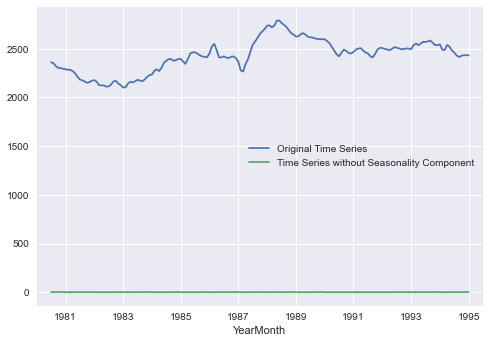

In [36]:
#df.Sparkling.plot()
trend.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

In [ ]:
multiplicative

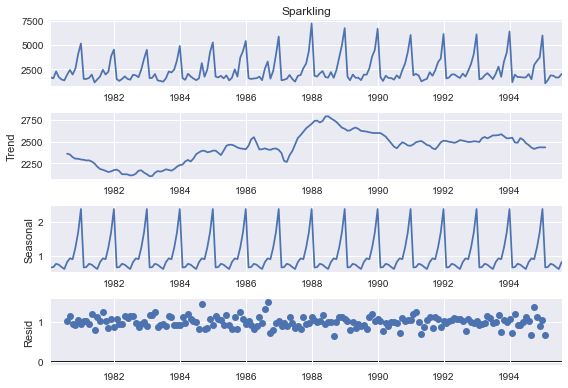

In [44]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [45]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: resi

In [ ]:
#Split the time series

In [46]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [47]:
from IPython.display import display

In [48]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [49]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


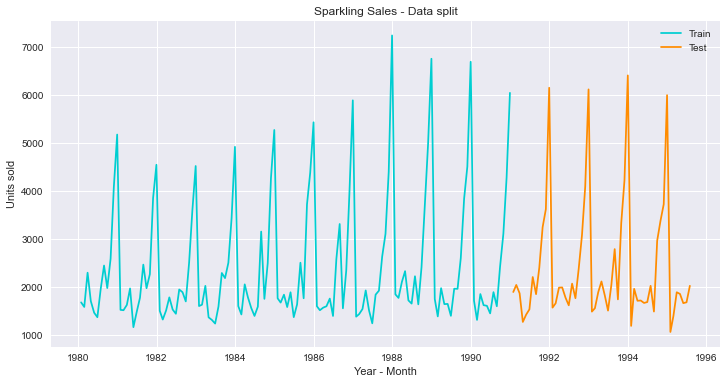

In [50]:
plt.figure(figsize = (12, 6))
plt.plot(train['Sparkling'], label = 'Train', color='darkturquoise')
plt.plot(test['Sparkling'], label = 'Test', color='darkorange')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling Sales - Data split', fontsize = 12)
plt.show;

In [ ]:
#Model 1: Linear Regression

In [51]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [52]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [53]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [54]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

In [55]:
LinearRegression_train['RegOnTime_spark'] = lr.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_spark'] = lr.predict(LinearRegression_test[['time']])

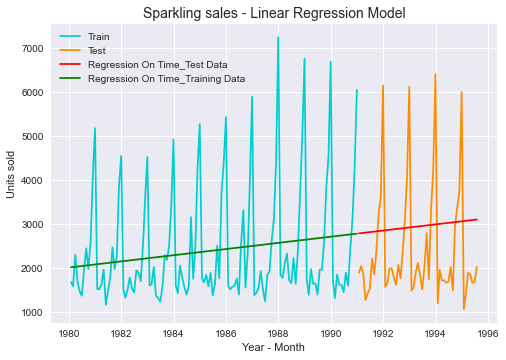

In [56]:
plt.plot( train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression On Time_Test Data', color = 'red')
plt.plot(LinearRegression_train['RegOnTime_spark'], label='Regression On Time_Training Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling sales - Linear Regression Model', fontsize = 14);

In [57]:
from sklearn import metrics
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [58]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model1_train = metrics.mean_squared_error(train['Sparkling'],LinearRegression_train['RegOnTime_spark'],squared=False)
mape_spark_model1_train = MAPE(train['Sparkling'],LinearRegression_train['RegOnTime_spark'])
print("For RegressionOnTime forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model1_train, mape_spark_model1_train))

For RegressionOnTime forecast on the Sparkling Training Data:  RMSE is 1279.322 and MAPE is 40.05


In [59]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model1_test = metrics.mean_squared_error(test['Sparkling'],LinearRegression_test['RegOnTime_spark'],squared=False)
mape_spark_model1_test = MAPE(test['Sparkling'],LinearRegression_test['RegOnTime_spark'])
print("For RegressionOnTime forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model1_test, mape_spark_model1_test))

For RegressionOnTime forecast on the Sparkling Testing Data:  RMSE is 1389.135 and MAPE is 50.15


In [60]:
spark_resultsDf = pd.DataFrame({'Test RMSE': [rmse_spark_model1_test],'Test MAPE': [mape_spark_model1_test]},index=['RegressionOnTime'])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15

In [ ]:
: Naive forecast

In [61]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [62]:
NaiveModel_train['spark_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['spark_naive'].head()

YearMonth
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: spark_naive, dtype: int64

In [63]:
NaiveModel_test['spark_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['spark_naive'].head()

YearMonth
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: spark_naive, dtype: int64

Text(0.5, 1.0, 'Sparkling - Naive Forecast')

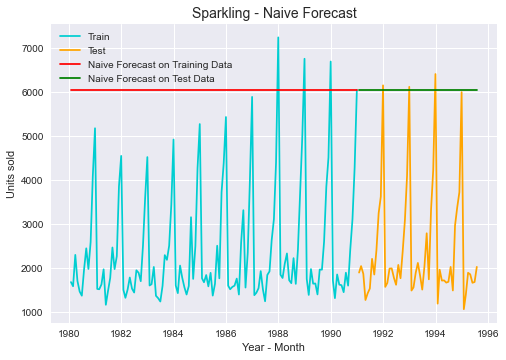

In [64]:
#plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['spark_naive'], label='Naive Forecast on Training Data', color = 'red')
plt.plot(NaiveModel_test['spark_naive'], label='Naive Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - Naive Forecast", fontsize = 14)

In [ ]:
modeleval

In [65]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['spark_naive'],squared=False)
mape_spark_model2_train = MAPE(train['Sparkling'],NaiveModel_train['spark_naive'])
print("For Naive forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model2_train, mape_spark_model2_train))

For Naive forecast on the Sparkling Training Data:  RMSE is 3867.701 and MAPE is 153.17


In [66]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['spark_naive'],squared=False)
mape_spark_model2_test = MAPE(test['Sparkling'],NaiveModel_test['spark_naive'])
print("For Naive forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model2_test, mape_spark_model2_test))

For Naive forecast on the Sparkling Testing Data:  RMSE is 3864.279 and MAPE is 152.87


In [67]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model2_test],'Test MAPE': [mape_spark_model2_test]},index=['NaiveModel'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87

In [ ]:
simple average

In [68]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [69]:
SimpleAverage_train['spark_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train['spark_mean_forecast'].head()

YearMonth
1980-01-31    2403.780303
1980-02-29    2403.780303
1980-03-31    2403.780303
1980-04-30    2403.780303
1980-05-31    2403.780303
Name: spark_mean_forecast, dtype: float64

In [70]:
SimpleAverage_test['spark_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test['spark_mean_forecast'].head()

YearMonth
1991-01-31    2403.780303
1991-02-28    2403.780303
1991-03-31    2403.780303
1991-04-30    2403.780303
1991-05-31    2403.780303
Name: spark_mean_forecast, dtype: float64

Text(0.5, 1.0, 'Sparkling - SimpleAverage Forecast')

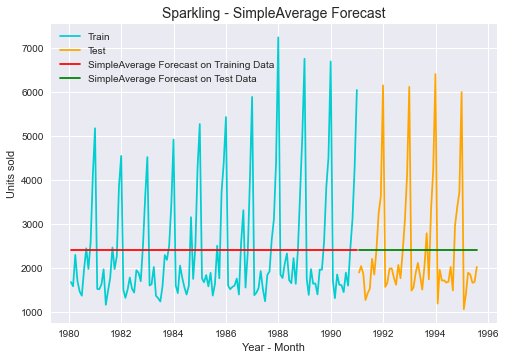

In [71]:
#plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['spark_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'red')
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - SimpleAverage Forecast", fontsize=14)

In [ ]:
modeleval

In [72]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'],squared=False)
mape_spark_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'])
print("For Simple Average forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model3_train, mape_spark_model3_train))

For Simple Average forecast on the Sparkling Training Data:  RMSE is 1298.484 and MAPE is 40.36


In [73]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'],squared=False)
mape_spark_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'])
print("For Simple Average forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model3_test, mape_spark_model3_test))

For Simple Average forecast on the Sparkling Testing Data:  RMSE is 1275.082 and MAPE is 38.90


In [74]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model3_test],'Test MAPE': [mape_spark_model3_test]},index=['SimpleAverage'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87
SimpleAverage     1275.081804      38.90

In [ ]:
moving average

In [75]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [76]:
MovingAverage['Spark_Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Spark_Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Spark_Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Spark_Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()


MovingAverage.head()

Sparkling  Spark_Trailing_2  Spark_Trailing_4  Spark_Trailing_6  \
YearMonth                                                                     
1980-01-31       1686               NaN               NaN               NaN   
1980-02-29       1591            1638.5               NaN               NaN   
1980-03-31       2304            1947.5               NaN               NaN   
1980-04-30       1712            2008.0           1823.25               NaN   
1980-05-31       1471            1591.5           1769.50               NaN   

            Spark_Trailing_9  
YearMonth                     
1980-01-31               NaN  
1980-02-29               NaN  
1980-03-31               NaN  
1980-04-30               NaN  
1980-05-31               NaN

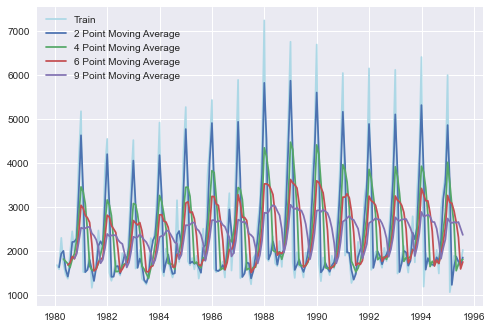

In [77]:
plt.plot(MovingAverage['Sparkling'], label='Train', color='lightblue')
plt.plot(MovingAverage['Spark_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')

In [78]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

Text(0.5, 1.0, 'Sparkling - Trailing Moving Average Forecast')

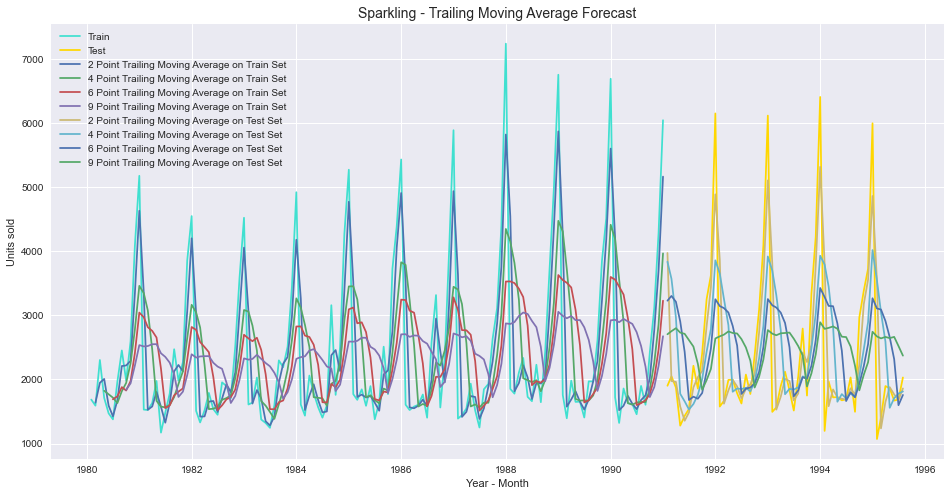

In [79]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train', color = 'turquoise')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Sparkling - Trailing Moving Average Forecast", fontsize=14)

In [80]:
## Test Data - rmse_spark and mape_spark --> 2 point Spark_Trailing MA

rmse_spark_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'],squared=False)
mape_spark_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_2, mape_spark_model4_test_2))

## Test Data - rmse_spark and mape_spark --> 4 point Spark_Trailing MA

rmse_spark_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'],squared=False)
mape_spark_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_4, mape_spark_model4_test_4))

## Test Data - rmse_spark and mape_spark --> 6 point Spark_Trailing MA

rmse_spark_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'],squared=False)
mape_spark_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_6, mape_spark_model4_test_6))

## Test Data - rmse_spark and mape_spark --> 9 point Spark_Trailing MA

rmse_spark_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'],squared=False)
mape_spark_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_9, mape_spark_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is 813.401 mape_spark is 19.70
For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is 1156.590 mape_spark is 35.96
For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is 1283.927 mape_spark is 43.86
For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is 1346.278 mape_spark is 46.86


In [82]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_spark_model4_test_2,rmse_spark_model4_test_4
                                          ,rmse_spark_model4_test_6,rmse_spark_model4_test_9]
                            ,'Test MAPE': [mape_spark_model4_test_2,mape_spark_model4_test_4,
                                           mape_spark_model4_test_6,mape_spark_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_4])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87
SimpleAverage     1275.081804      38.90
2 point TMA        813.400684      19.70
4 point TMA       1156.589694      35.96
6 point TMA       1283.927428      43.86
9 point TMA       1346.278315      46.86

In [ ]:
simple expo

In [84]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [85]:
SES_train = train.copy()
SES_test = test.copy()

In [86]:
SES_train['Sparkling'].head()

YearMonth
1980-01-31    1686
1980-02-29    1591
1980-03-31    2304
1980-04-30    1712
1980-05-31    1471
Name: Sparkling, dtype: int64

In [87]:
model = SimpleExpSmoothing(np.asarray(SES_train['Sparkling']))

Test: For alpha = 0.05,  RMSE is 1316.4117 MAPE is 45.50
For smoothing level = 0.05,  Initial level 1686.00


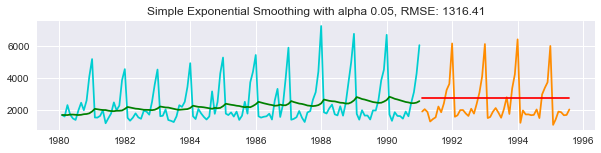

Test: For alpha = 0.10,  RMSE is 1375.3934 MAPE is 49.53
For smoothing level = 0.10,  Initial level 1686.00


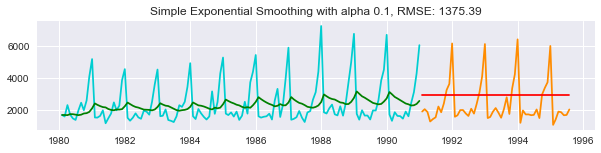

Test: For alpha = 0.20,  RMSE is 1595.2068 MAPE is 60.46
For smoothing level = 0.20,  Initial level 1686.00


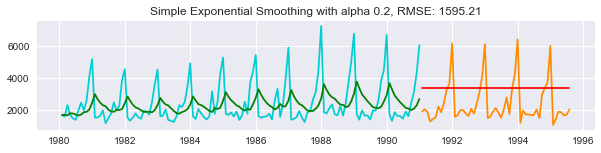

Test: For alpha = 0.30,  RMSE is 1935.5071 MAPE is 75.66
For smoothing level = 0.30,  Initial level 1686.00


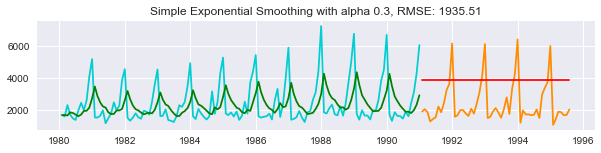

Test: For alpha = 0.50,  RMSE is 2666.3514 MAPE is 106.27
For smoothing level = 0.50,  Initial level 1686.00


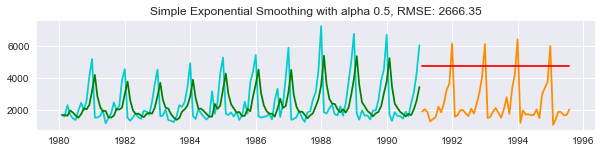

Test: For alpha = 0.99,  RMSE is 3847.5490 MAPE is 152.21
For smoothing level = 0.99,  Initial level 1686.00


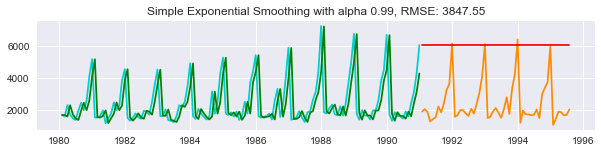

In [88]:
alpha_list = [0.05, 0.1, 0.2, 0.3, 0.5, 0.99]
pred_train_SES  = train.copy()
pred_test_SES  = test.copy() # Have a copy of the test dataset

#starting a loop
for alpha_value in alpha_list:

    alpha_str            =  "SES " + str(alpha_value)
    mode_fit_i           =  model.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_train_SES[alpha_str]  =  mode_fit_i.fittedvalues #calculating the forecasts for the train set 
    pred_test_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Sparkling']))#calculating the forecasts for the test set 
    rmse                 =  np.sqrt(metrics.mean_squared_error(test['Sparkling'], pred_test_SES[alpha_str]))#calculate the RMSE for the test set
    mape                 =  MAPE(test['Sparkling'],pred_test_SES[alpha_str])#calculate the MAPE for the test set
    
###

    print("Test: For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))
    plt.figure(figsize=(10,2))
    #Plotting the training, test and the predicted time series plots
    plt.plot(train['Sparkling'], color = 'darkturquoise')
    plt.plot(test['Sparkling'], color = 'darkorange')
   # plt.plot(pred_train_SES[alpha_str], label  = "Train "+alpha_str, color = 'green')
   # plt.plot(pred_test_SES[alpha_str], label  = "Test "+alpha_str, color = 'red')
    plt.plot(pred_train_SES[alpha_str], color = 'green')
    plt.plot(pred_test_SES[alpha_str], color = 'red')
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value)+', RMSE: '+str(np.round(rmse,2)))
    #plt.legend(loc='best') 
    plt.show();

In [89]:
model_SES_autofit = model.fit(optimized=True,use_brute=True)

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [90]:
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [91]:
SES_train['predict_spark'] = model_SES_autofit.fittedvalues
SES_train.head()

Sparkling  predict_spark
YearMonth                           
1980-01-31       1686    1818.535750
1980-02-29       1591    1811.961001
1980-03-31       2304    1800.999709
1980-04-30       1712    1825.952226
1980-05-31       1471    1820.299357

In [92]:
SES_test['predict_spark'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

Sparkling  predict_spark
YearMonth                           
1991-01-31       1902    2724.932624
1991-02-28       2049    2724.932624
1991-03-31       1874    2724.932624
1991-04-30       1279    2724.932624
1991-05-31       1432    2724.932624

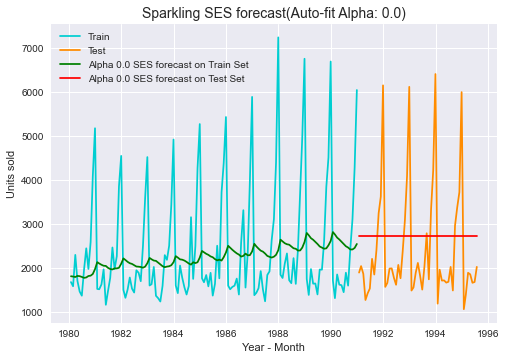

In [93]:
## Plotting on both the Training and Test data

#plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(SES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SES_train['predict_spark'],color = 'green', label='Alpha 0.0 SES forecast on Train Set')
plt.plot(SES_test['predict_spark'],color = 'red', label='Alpha 0.0 SES forecast on Test Set')

plt.legend(loc='best')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling SES forecast(Auto-fit Alpha: 0.0)', fontsize = 14);

#print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))

In [94]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model5_train = metrics.mean_squared_error(train['Sparkling'],SES_train['predict_spark'],squared=False)
mape_spark_model5_train = MAPE(train['Sparkling'],SES_train['predict_spark'])
print("For SES forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_train, mape_spark_model5_train))

For SES forecast on the Sparkling Training Data:  RMSE is 1315.232 and MAPE is 39.92


In [95]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model5_test = metrics.mean_squared_error(test['Sparkling'],SES_test['predict_spark'],squared=False)
mape_spark_model5_test = MAPE(test['Sparkling'],SES_test['predict_spark'])
print("For SES forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_test, mape_spark_model5_test))

For SES forecast on the Sparkling Testing Data:  RMSE is 1316.035 and MAPE is 45.47


In [96]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_spark_model5_test],'Test MAPE': [mape_spark_model5_test]},index=['SES Alpha 0.00'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_5])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87
SimpleAverage     1275.081804      38.90
2 point TMA        813.400684      19.70
4 point TMA       1156.589694      35.96
6 point TMA       1283.927428      43.86
9 point TMA       1346.278315      46.86
SES Alpha 0.00    1316.035487      45.47

In [ ]:
Double Exponential Smoothing (Holt's Model)

In [98]:
DES_train = train.copy()
DES_test = test.copy()

In [99]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [100]:
resultsDf_6 = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[],
                            'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict_spark',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict_spark',i,j] = model_DES_alpha_i_j.forecast(len(test['Sparkling']))
        
        rmse_spark_model6_train = np.round(metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict_spark',i,j],squared=False),2)
        mape_spark_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict_spark',i,j])
        
        rmse_spark_model6_test = np.round(metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',i,j],squared=False),2)
        mape_spark_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict_spark',i,j])
        
        resultsDf_6 = resultsDf_6.append({'Alpha':i,'Beta':j,
                                          'Train RMSE':rmse_spark_model6_train ,'Train MAPE': mape_spark_model6_train,
                                          'Test RMSE':rmse_spark_model6_test ,'Test MAPE':mape_spark_model6_test}, 
                                         ignore_index=True)

In [101]:
resultsDf_6.sort_values(by=['Test RMSE']).head(5)

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1     1363.47       44.26    1779.42      67.23
1     0.1   0.2     1398.19       45.61    2601.54      95.50
10    0.2   0.1     1412.03       46.62    3611.77     135.41
2     0.1   0.3     1431.37       46.90    4288.43     155.25
20    0.3   0.1     1428.27       46.92    5908.19     223.50

In [102]:
resultsDf_6.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1     1363.47       44.26    1779.42      67.23
1     0.1   0.2     1398.19       45.61    2601.54      95.50
10    0.2   0.1     1412.03       46.62    3611.77     135.41
2     0.1   0.3     1431.37       46.90    4288.43     155.25
3     0.1   0.4     1466.77       48.27    6042.38     219.09

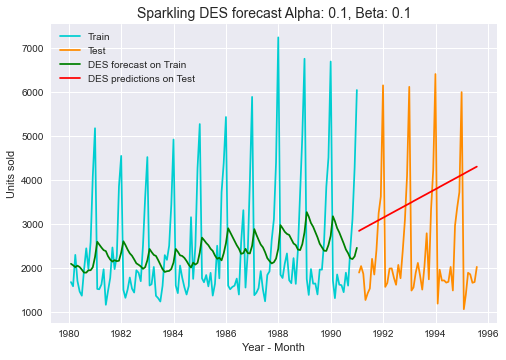

In [103]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_spark', 0.1, 0.1], color = 'green', label='DES forecast on Train')
plt.plot(DES_test['predict_spark', 0.1, 0.1], color = 'red', label='DES predictions on Test')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling DES forecast Alpha: 0.1, Beta: 0.1', fontsize=14)
plt.legend(loc='best')

In [104]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [105]:
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [106]:
alpha = model_DES_autofit.params['smoothing_level']
beta = model_DES_autofit.params['smoothing_trend']
alpha_6_1 = alpha
beta_6_1 = beta

In [107]:
DES_train['predict_spark',alpha,beta] = model_DES_autofit.fittedvalues
#DES_train.head()

In [108]:
DES_test['predict_spark',alpha,beta] = model_DES_autofit.forecast(len(test['Sparkling']))
#DES_test.head()

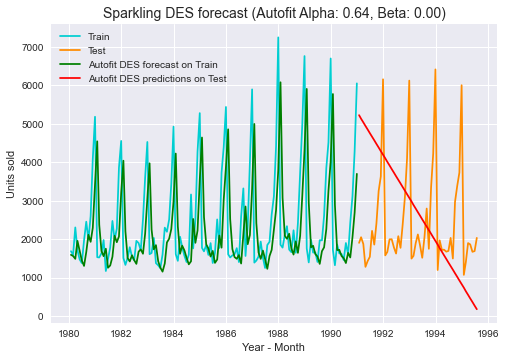

In [109]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_spark',alpha,beta], color = 'green', label='Autofit DES forecast on Train')
plt.plot(DES_test['predict_spark',alpha,beta], color = 'red', label='Autofit DES predictions on Test')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling DES forecast (Autofit Alpha: 0.64, Beta: 0.00)', fontsize=14);
plt.legend(loc='best')

In [110]:
rmse_spark_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict_spark',alpha,beta],squared=False)
mape_spark_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict_spark',alpha,beta])
        
rmse_spark_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta],squared=False)
mape_spark_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta])

resultsDf_6 = resultsDf_6.append({'Alpha':alpha,'Beta':beta,'Train RMSE':rmse_spark_model6_train
                                      ,'Train MAPE': mape_spark_model6_train,'Test RMSE':rmse_spark_model6_test
                                      ,'Test MAPE':mape_spark_model6_test}, ignore_index=True)

In [111]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha    Beta  Train RMSE  Train MAPE    Test RMSE  Test MAPE
0    0.100000  0.1000  1363.47000       44.26  1779.420000      67.23
100  0.688571  0.0001  1349.65046       39.23  2007.238526      68.23
1    0.100000  0.2000  1398.19000       45.61  2601.540000      95.50
10   0.200000  0.1000  1412.03000       46.62  3611.770000     135.41
2    0.100000  0.3000  1431.37000       46.90  4288.430000     155.25

In [112]:
resultsDf_6.sort_values(by=['Test MAPE']).head()

Alpha    Beta  Train RMSE  Train MAPE    Test RMSE  Test MAPE
0    0.100000  0.1000  1363.47000       44.26  1779.420000      67.23
100  0.688571  0.0001  1349.65046       39.23  2007.238526      68.23
1    0.100000  0.2000  1398.19000       45.61  2601.540000      95.50
10   0.200000  0.1000  1412.03000       46.62  3611.770000     135.41
2    0.100000  0.3000  1431.37000       46.90  4288.430000     155.25

In [113]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][100]],
                              'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][100]]}
                           ,index=['DES Alpha 0.1,Beta 0.1','DES Alpha 0.6,Beta 0.0'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_6_1])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime        1389.135175      50.15
NaiveModel              3864.279352     152.87
SimpleAverage           1275.081804      38.90
2 point TMA              813.400684      19.70
4 point TMA             1156.589694      35.96
6 point TMA             1283.927428      43.86
9 point TMA             1346.278315      46.86
SES Alpha 0.00          1316.035487      45.47
DES Alpha 0.1,Beta 0.1  1779.420000      67.23
DES Alpha 0.6,Beta 0.0  2007.238526      68.23

In [ ]:
Triple Exponential Smoothing (Holt - Winter's Model)

In [115]:
TES_train = train.copy()
TES_test = test.copy()

In [116]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')
#model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='additive',freq='M')

In [117]:
resultsDf_7_1 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict_spark',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_spark',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test['Sparkling']))
        
            rmse_spark_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_spark',i,j,k],squared=False)
            mape_spark_model7_train = MAPE(TES_train['Sparkling'],TES_train['predict_spark',i,j,k])
        
            rmse_spark_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_spark',i,j,k],squared=False)
            mape_spark_model7_test = MAPE(TES_test['Sparkling'],TES_test['predict_spark',i,j,k])
        
            resultsDf_7_1 = resultsDf_7_1.append({'Alpha':i,'Beta':j,'Gamma':k,'Train RMSE':rmse_spark_model7_train
                                      ,'Train MAPE': mape_spark_model7_train,'Test RMSE':rmse_spark_model7_test
                                      ,'Test MAPE': mape_spark_model7_test}, ignore_index=True)

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: Convergen

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: Convergen

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: Convergen

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: Convergen

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: Convergen

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: Convergen

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: Convergen

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: Convergen

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: Convergen

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: Convergen

In [118]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
211    0.3   0.2    0.2  378.189776       11.28  314.882349      10.10
301    0.4   0.1    0.2  373.815525       11.13  315.533374      10.41
300    0.4   0.1    0.1  371.341930       11.14  318.045761      10.24
402    0.5   0.1    0.3  390.175608       11.54  325.545203       9.99
30     0.1   0.4    0.1  403.937167       11.72  330.772119      10.56

In [119]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
402    0.5   0.1    0.3  390.175608       11.54  325.545203       9.99
211    0.3   0.2    0.2  378.189776       11.28  314.882349      10.10
300    0.4   0.1    0.1  371.341930       11.14  318.045761      10.24
301    0.4   0.1    0.2  373.815525       11.13  315.533374      10.41
30     0.1   0.4    0.1  403.937167       11.72  330.772119      10.56

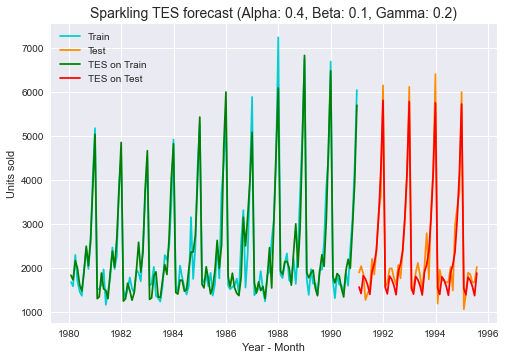

In [120]:
#plt.figure(figsize=(15,5))
plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_spark', 0.4, 0.1, 0.2], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_spark', 0.4, 0.1, 0.2], color='red', label='TES on Test')

#plt.plot(TES_train['predict_spark', 0.5, 0.1, 0.3], color = 'green', label='Alpha=0.5,Beta=0.1,Gamma=0.3,TES on Train')
#plt.plot(TES_test['predict_spark', 0.5, 0.1, 0.3], color='red', label='Alpha=0.5,Beta=0.1,Gamma=0.3,TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Alpha: 0.4, Beta: 0.1, Gamma: 0.2)', fontsize=14)

plt.legend(loc='best')

In [121]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [122]:
model_TES_autofit.params

{'smoothing_level': 0.111108139467838,
 'smoothing_trend': 0.06172875597197263,
 'smoothing_seasonal': 0.3950479631147446,
 'damping_trend': nan,
 'initial_level': 1639.9340657558994,
 'initial_trend': -12.22494561218149,
 'initial_seasons': array([1.06402008, 1.02352078, 1.40671876, 1.20165543, 0.97593   ,
        0.97100155, 1.31897446, 1.69588922, 1.3895294 , 1.81476396,
        2.85150039, 3.62470528]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [123]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_trend']
gamma = model_TES_autofit.params['smoothing_seasonal']
alpha_7_1 = alpha
beta_7_1 = beta
gamma_7_1 = gamma

In [124]:
TES_train['predict_spark',alpha,beta,gamma] = model_TES_autofit.fittedvalues

In [125]:
TES_test['predict_spark',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test['Sparkling']))

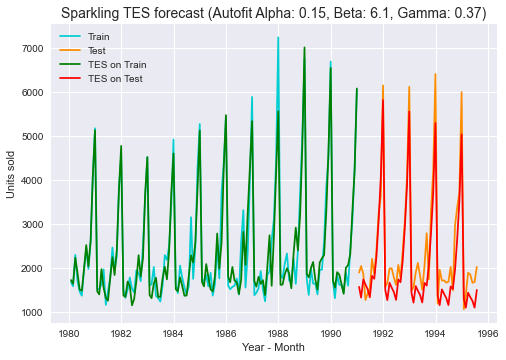

In [126]:
plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_spark',alpha,beta,gamma], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_spark',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Autofit Alpha: 0.15, Beta: 6.1, Gamma: 0.37)', fontsize=14)

plt.legend(loc='best')

In [127]:
rmse_spark_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_spark',alpha,beta,gamma],squared=False)
mape_spark_model7_train = MAPE(TES_train['Sparkling'],TES_train['predict_spark',alpha,beta,gamma])
        
rmse_spark_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_spark',alpha,beta,gamma],squared=False)
mape_spark_model7_test = MAPE(TES_test['Sparkling'],TES_test['predict_spark',alpha,beta,gamma])
        
resultsDf_7_1 = resultsDf_7_1.append({'Alpha':np.round(alpha,2),'Beta':np.round(beta,2),'Gamma':np.round(gamma,2),'Train RMSE':rmse_spark_model7_train
                                      ,'Train MAPE': mape_spark_model7_train,'Test RMSE':rmse_spark_model7_test
                                      ,'Test MAPE': mape_spark_model7_test}, ignore_index=True)

In [128]:
resultsDf_7_1.tail()

Alpha  Beta  Gamma     Train RMSE  Train MAPE     Test RMSE  Test MAPE
996    1.00  1.00    0.7   94040.964957     1036.30  1.074413e+06   28878.00
997    1.00  1.00    0.8  102196.953755      888.48  5.010607e+06   65738.32
998    1.00  1.00    0.9   77924.294413      876.07  4.318265e+05    6048.85
999    1.00  1.00    1.0  239917.432848     1303.21  1.254280e+05    3313.86
1000   0.11  0.06    0.4     356.974929       10.25  4.697680e+02      16.40

In [129]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
211    0.3   0.2    0.2  378.189776       11.28  314.882349      10.10
301    0.4   0.1    0.2  373.815525       11.13  315.533374      10.41
300    0.4   0.1    0.1  371.341930       11.14  318.045761      10.24
402    0.5   0.1    0.3  390.175608       11.54  325.545203       9.99
30     0.1   0.4    0.1  403.937167       11.72  330.772119      10.56

In [130]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
402    0.5   0.1    0.3  390.175608       11.54  325.545203       9.99
211    0.3   0.2    0.2  378.189776       11.28  314.882349      10.10
300    0.4   0.1    0.1  371.341930       11.14  318.045761      10.24
301    0.4   0.1    0.2  373.815525       11.13  315.533374      10.41
30     0.1   0.4    0.1  403.937167       11.72  330.772119      10.56

In [131]:
resultsDf_7_sp = pd.DataFrame({'Test RMSE': [resultsDf_7_1['Test RMSE'][301],resultsDf_7_1['Test RMSE'][1000]],
                              'Test MAPE': [resultsDf_7_1['Test MAPE'][301],resultsDf_7_1['Test MAPE'][1000]]}
                           ,index=['TES Alpha 0.4, Beta 0.1, Gamma 0.2','TES Alpha 0.15, Beta 0.00, Gamma 0.37'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_7_sp])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.00                         1316.035487      45.47
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
TES Alpha 0.15, Beta 0.00, Gamma 0.37   469.767970      16.40

In [132]:
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
TES Alpha 0.15, Beta 0.00, Gamma 0.37   469.767970      16.40
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
SimpleAverage                          1275.081804      38.90
6 point TMA                            1283.927428      43.86
SES Alpha 0.00                         1316.035487      45.47
9 point TMA                            1346.278315      46.86
RegressionOnTime                       1389.135175      50.15
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
NaiveModel                             3864.279352     152.87

Text(0.5, 1.0, 'SPARKLING : Forecast Vs Actual Test set')

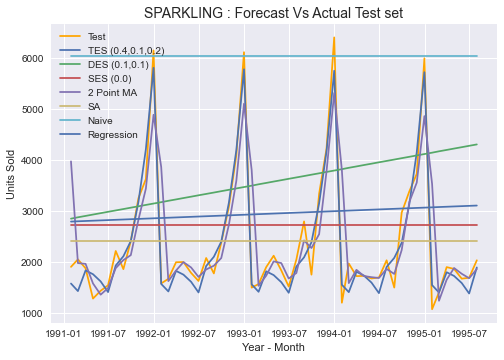

In [133]:
#plt.figure(figsize=(20,12))

#plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'orange')
#TES
#plt.plot(TES_train['predict_spark',0.4,0.1,0.2], label='TES on Train')
#DES
#plt.plot(DES_train['predict_spark',0.1,0.1], label='DES on Train')
#SES
#plt.plot(SES_train['predict_spark'], label='SES on Train')
#MA
#plt.plot(trailing_MovingAverage_train['Spark_Trailing_2'], label='2 Point MA on Train')
#SA
#plt.plot(SimpleAverage_train['spark_mean_forecast'], label='SA on Train')
#Naive
#plt.plot(NaiveModel_train['spark_naive'], label='Naive on Train')
#Regression
#plt.plot(LinearRegression_train['RegOnTime_spark'], label='Regression on Train')

#TES
plt.plot(TES_test['predict_spark',0.4,0.1,0.2],  label='TES (0.4,0.1,0.2)')
#DES
plt.plot(DES_test['predict_spark',0.1,0.1],  label='DES (0.1,0.1)')
#SES
plt.plot(SES_test['predict_spark'],  label='SES (0.0)')
#MA
plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['spark_naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Year - Month')
plt.ylabel('Units Sold')
plt.title('SPARKLING : Forecast Vs Actual Test set', fontsize=14)

In [134]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

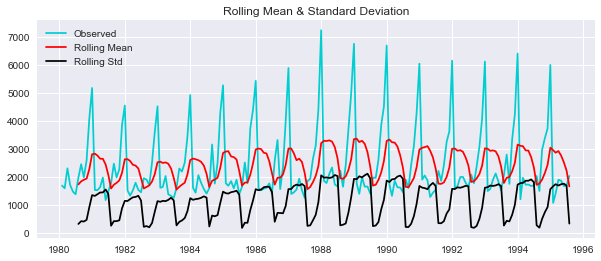

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [135]:
plt.figure(figsize=(10,4))
test_stationarity(df['Sparkling'],'darkturquoise')

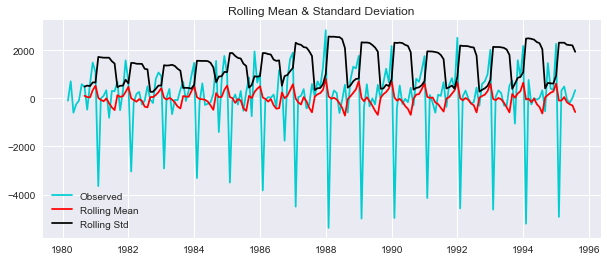

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [136]:
plt.figure(figsize=(10,4))
test_stationarity(df['Sparkling'].diff().dropna(),'darkturquoise')

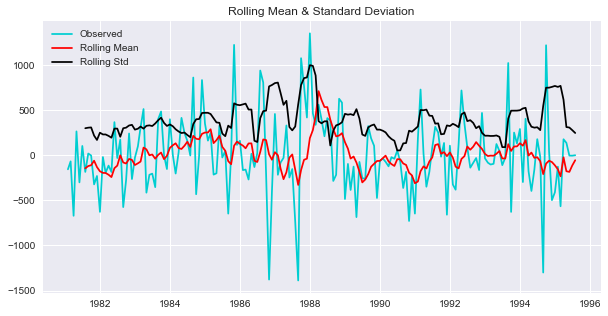

Results of Dickey-Fuller Test:
Test Statistic                  -4.460165
p-value                          0.000232
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [137]:
plt.figure(figsize=(10,5))
test_stationarity(df['Sparkling'].diff(12).dropna(), 'darkturquoise')

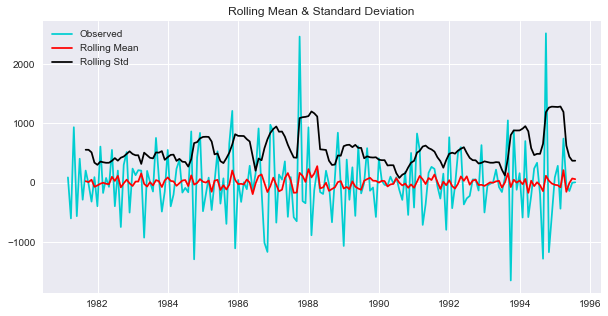

Results of Dickey-Fuller Test:
Test Statistic                  -5.113533
p-value                          0.000013
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [138]:
plt.figure(figsize=(10,5))
test_stationarity((df['Sparkling'].diff(12).dropna()).diff().dropna(), 'darkturquoise')

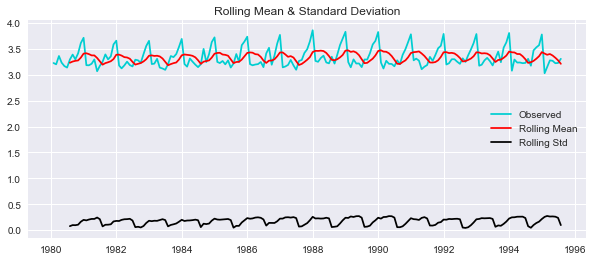

Results of Dickey-Fuller Test:
Test Statistic                  -1.749630
p-value                          0.405740
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [139]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Sparkling']), 'darkturquoise')

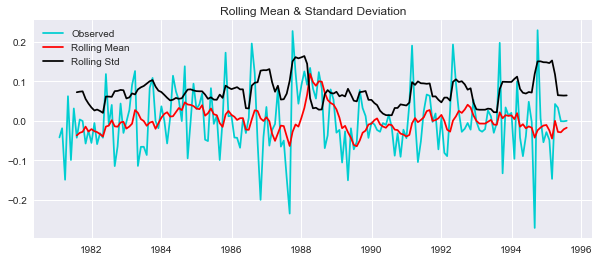

Results of Dickey-Fuller Test:
Test Statistic                  -5.183811
p-value                          0.000009
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [140]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Sparkling']).diff(12).dropna(),  'darkturquoise')

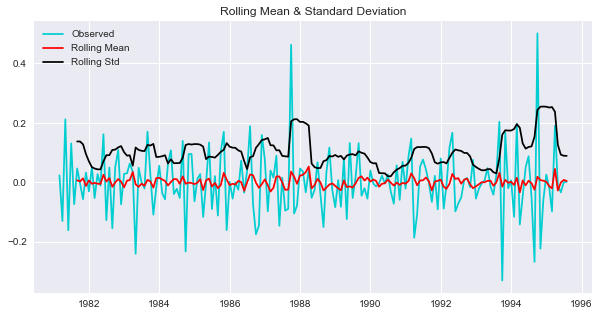

Results of Dickey-Fuller Test:
Test Statistic                  -5.254601
p-value                          0.000007
#Lags Used                      12.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64 



In [141]:
plt.figure(figsize=(10,5))
test_stationarity((np.log10(df['Sparkling']).diff(12).dropna()).diff().dropna(),  'darkturquoise')

In [ ]:
Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF 
on the training data and evaluate this model on the test data using RMSE.
Build a table with all the models built along with their corresponding 
parameters and the respective RMSE values on the test data.


In [143]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 720x360 with 0 Axes>

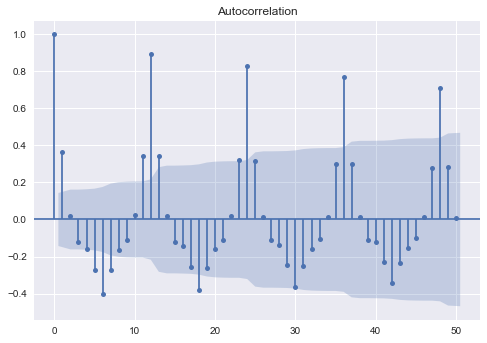

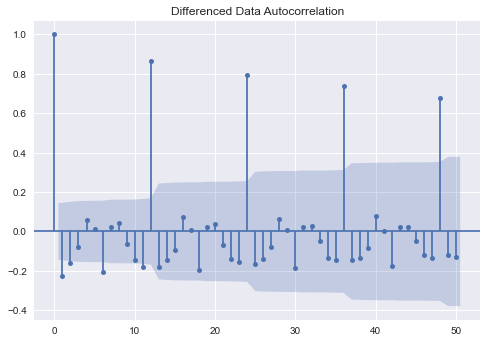

In [144]:
plt.figure(figsize=(10,5))
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

In [ ]:
#PACF Plots

<Figure size 720x360 with 0 Axes>

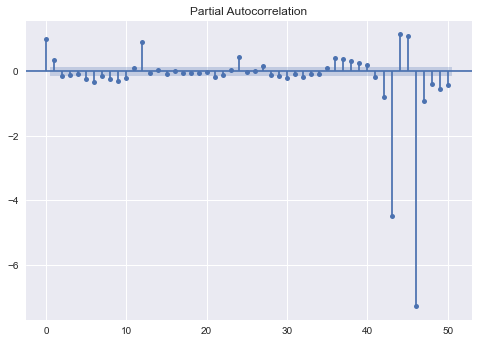

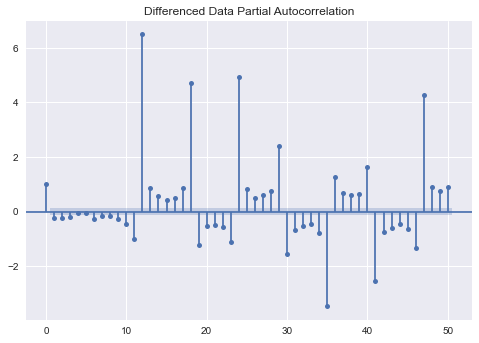

In [145]:
plt.figure(figsize=(10,5))
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [ ]:
aic

In [146]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

In [147]:
import itertools
p = q = range(0,4)
d= range(1,2)
D = range(1,2)
#p = q = range(0,1)
#d= range(0,1)
#D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [148]:
SARIMA_AIC_spark = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [149]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark = SARIMA_model_spark.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark.aic))
        SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1822.9824851895298
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1626.8626334678665
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1452.6773574252113


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:3395.585855651415
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1646.377816766144
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1628.3243908192392
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1454.5289621307425
SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:5858.1932688069055
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1468.500098186666
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1455.9911553686907


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:3027.1606381881866
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:1289.2398197439918
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:1291.2448875094415
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:1288.607038027663


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:4143.841833179977
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1760.6565719828523
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.6639234230054
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:1399.108384667958


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 1, 3, 12)7 - AIC:3622.264792032814
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:1602.8594819023883
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:1570.8550259196109
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:1400.6709524136913


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 1, 3, 12)7 - AIC:2849.660566508435
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:1428.2448811159443
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:1429.6168027963063
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:1402.638588848429


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 1, 3, 12)7 - AIC:88.05829549267688
SARIMA(0, 1, 1)x(3, 1, 0, 12)7 - AIC:1255.5784542932213
SARIMA(0, 1, 1)x(3, 1, 1, 12)7 - AIC:1257.4558568591324
SARIMA(0, 1, 1)x(3, 1, 2, 12)7 - AIC:1258.2925125564807


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 1, 3, 12)7 - AIC:3464.1516073365215
SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC:1741.3207220431198
SARIMA(0, 1, 2)x(0, 1, 1, 12)7 - AIC:1554.7429039621761
SARIMA(0, 1, 2)x(0, 1, 2, 12)7 - AIC:1382.4842540786447
SARIMA(0, 1, 2)x(0, 1, 3, 12)7 - AIC:3327.708545397462
SARIMA(0, 1, 2)x(1, 1, 0, 12)7 - AIC:1601.7587293000872
SARIMA(0, 1, 2)x(1, 1, 1, 12)7 - AIC:1556.155971744277
SARIMA(0, 1, 2)x(1, 1, 2, 12)7 - AIC:1384.398867202198


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 1, 3, 12)7 - AIC:2418.987865758896
SARIMA(0, 1, 2)x(2, 1, 0, 12)7 - AIC:1427.0773415442964
SARIMA(0, 1, 2)x(2, 1, 1, 12)7 - AIC:1428.5534767511854
SARIMA(0, 1, 2)x(2, 1, 2, 12)7 - AIC:1386.0237342699916
SARIMA(0, 1, 2)x(2, 1, 3, 12)7 - AIC:4353.783814442379
SARIMA(0, 1, 2)x(3, 1, 0, 12)7 - AIC:1254.6525579264958
SARIMA(0, 1, 2)x(3, 1, 1, 12)7 - AIC:1256.9866634020252
SARIMA(0, 1, 2)x(3, 1, 2, 12)7 - AIC:1257.425325868642


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 1, 3, 12)7 - AIC:3765.265224271831
SARIMA(0, 1, 3)x(0, 1, 0, 12)7 - AIC:1727.2607378275443
SARIMA(0, 1, 3)x(0, 1, 1, 12)7 - AIC:1540.7948184312986
SARIMA(0, 1, 3)x(0, 1, 2, 12)7 - AIC:1369.9603671034524


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 1, 3, 12)7 - AIC:3399.55760128214
SARIMA(0, 1, 3)x(1, 1, 0, 12)7 - AIC:1602.1924100607444
SARIMA(0, 1, 3)x(1, 1, 1, 12)7 - AIC:1542.6814540469343
SARIMA(0, 1, 3)x(1, 1, 2, 12)7 - AIC:1371.73632715315


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 1, 3, 12)7 - AIC:1224.0151095795686
SARIMA(0, 1, 3)x(2, 1, 0, 12)7 - AIC:1428.3896856876656
SARIMA(0, 1, 3)x(2, 1, 1, 12)7 - AIC:1429.8265181282704
SARIMA(0, 1, 3)x(2, 1, 2, 12)7 - AIC:1373.4524731724373


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 1, 3, 12)7 - AIC:2683.5176626498665
SARIMA(0, 1, 3)x(3, 1, 0, 12)7 - AIC:1256.0020281099096
SARIMA(0, 1, 3)x(3, 1, 1, 12)7 - AIC:1258.07476135753
SARIMA(0, 1, 3)x(3, 1, 2, 12)7 - AIC:1258.9452629536356


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 1, 3, 12)7 - AIC:3685.796249552855
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:1810.9513015567375
SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:1613.7407033409966
SARIMA(1, 1, 0)x(0, 1, 2, 12)7 - AIC:1441.4259994233912


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 1, 3, 12)7 - AIC:3358.445672214749
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:1619.6703363510067
SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:1615.7404485349114
SARIMA(1, 1, 0)x(1, 1, 2, 12)7 - AIC:1443.1035528174652


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 1, 3, 12)7 - AIC:3757.870589795478
SARIMA(1, 1, 0)x(2, 1, 0, 12)7 - AIC:1440.5741628098947
SARIMA(1, 1, 0)x(2, 1, 1, 12)7 - AIC:1442.5059371245395
SARIMA(1, 1, 0)x(2, 1, 2, 12)7 - AIC:1444.4274245939616
SARIMA(1, 1, 0)x(2, 1, 3, 12)7 - AIC:3135.4587560625173
SARIMA(1, 1, 0)x(3, 1, 0, 12)7 - AIC:1265.1747644704742
SARIMA(1, 1, 0)x(3, 1, 1, 12)7 - AIC:1267.1592027274442
SARIMA(1, 1, 0)x(3, 1, 2, 12)7 - AIC:1263.9849693710496


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 1, 3, 12)7 - AIC:3753.2794427322633
SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:1757.3654162745872
SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.3827366812845
SARIMA(1, 1, 1)x(0, 1, 2, 12)7 - AIC:1398.7561672224847


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 1, 3, 12)7 - AIC:2737.9618783390647
SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:1588.0655672689265
SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:1570.6724644580663
SARIMA(1, 1, 1)x(1, 1, 2, 12)7 - AIC:1400.4523886146949


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 1, 3, 12)7 - AIC:1994.6886956107899
SARIMA(1, 1, 1)x(2, 1, 0, 12)7 - AIC:1413.5679859610987
SARIMA(1, 1, 1)x(2, 1, 1, 12)7 - AIC:1414.8736681603773
SARIMA(1, 1, 1)x(2, 1, 2, 12)7 - AIC:1402.2732672812683


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 1, 3, 12)7 - AIC:4287.656520992282
SARIMA(1, 1, 1)x(3, 1, 0, 12)7 - AIC:1240.8275546107775
SARIMA(1, 1, 1)x(3, 1, 1, 12)7 - AIC:1242.664098878592
SARIMA(1, 1, 1)x(3, 1, 2, 12)7 - AIC:1243.1145005595458


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 1, 3, 12)7 - AIC:3465.34766874072
SARIMA(1, 1, 2)x(0, 1, 0, 12)7 - AIC:1742.736627544211
SARIMA(1, 1, 2)x(0, 1, 1, 12)7 - AIC:1554.9584139011115
SARIMA(1, 1, 2)x(0, 1, 2, 12)7 - AIC:1382.3477800332091


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 1, 3, 12)7 - AIC:3182.999966554018
SARIMA(1, 1, 2)x(1, 1, 0, 12)7 - AIC:1585.7860900921323
SARIMA(1, 1, 2)x(1, 1, 1, 12)7 - AIC:1556.1300441715875
SARIMA(1, 1, 2)x(1, 1, 2, 12)7 - AIC:1384.1378738616008


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 1, 3, 12)7 - AIC:5837.111851784548
SARIMA(1, 1, 2)x(2, 1, 0, 12)7 - AIC:1411.9924109677218
SARIMA(1, 1, 2)x(2, 1, 1, 12)7 - AIC:1413.5918294118896
SARIMA(1, 1, 2)x(2, 1, 2, 12)7 - AIC:1385.68872078812


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 1, 3, 12)7 - AIC:18.0
SARIMA(1, 1, 2)x(3, 1, 0, 12)7 - AIC:1240.4397939412227
SARIMA(1, 1, 2)x(3, 1, 1, 12)7 - AIC:1242.3340377997522
SARIMA(1, 1, 2)x(3, 1, 2, 12)7 - AIC:1242.981190727135


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 1, 3, 12)7 - AIC:3689.022560891258
SARIMA(1, 1, 3)x(0, 1, 0, 12)7 - AIC:1727.0466394220655
SARIMA(1, 1, 3)x(0, 1, 1, 12)7 - AIC:1541.6027947471912
SARIMA(1, 1, 3)x(0, 1, 2, 12)7 - AIC:1370.6605716693812
SARIMA(1, 1, 3)x(0, 1, 3, 12)7 - AIC:1343.2396049320569
SARIMA(1, 1, 3)x(1, 1, 0, 12)7 - AIC:1587.782481939899
SARIMA(1, 1, 3)x(1, 1, 1, 12)7 - AIC:1544.604762297466
SARIMA(1, 1, 3)x(1, 1, 2, 12)7 - AIC:1372.2143069544604


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 1, 3, 12)7 - AIC:379.752439154133
SARIMA(1, 1, 3)x(2, 1, 0, 12)7 - AIC:1413.9496333316142
SARIMA(1, 1, 3)x(2, 1, 1, 12)7 - AIC:1415.5604694475016
SARIMA(1, 1, 3)x(2, 1, 2, 12)7 - AIC:1373.7153016148025


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 1, 3, 12)7 - AIC:406.7339261418749
SARIMA(1, 1, 3)x(3, 1, 0, 12)7 - AIC:1242.8330948723178
SARIMA(1, 1, 3)x(3, 1, 1, 12)7 - AIC:1244.8227467702543
SARIMA(1, 1, 3)x(3, 1, 2, 12)7 - AIC:1245.4466246273887


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 1, 3, 12)7 - AIC:3034.7854664224924
SARIMA(2, 1, 0)x(0, 1, 0, 12)7 - AIC:1779.6359486658964
SARIMA(2, 1, 0)x(0, 1, 1, 12)7 - AIC:1599.8657465663987
SARIMA(2, 1, 0)x(0, 1, 2, 12)7 - AIC:1429.6023214910736


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 1, 3, 12)7 - AIC:3345.7347661209124
SARIMA(2, 1, 0)x(1, 1, 0, 12)7 - AIC:1590.6714007730445
SARIMA(2, 1, 0)x(1, 1, 1, 12)7 - AIC:1587.514424657455
SARIMA(2, 1, 0)x(1, 1, 2, 12)7 - AIC:1431.1873135882854


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 1, 3, 12)7 - AIC:5990.627055680786
SARIMA(2, 1, 0)x(2, 1, 0, 12)7 - AIC:1413.6736725426342
SARIMA(2, 1, 0)x(2, 1, 1, 12)7 - AIC:1415.63242937476
SARIMA(2, 1, 0)x(2, 1, 2, 12)7 - AIC:1417.3668472985667


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 1, 3, 12)7 - AIC:3302.01109397415
SARIMA(2, 1, 0)x(3, 1, 0, 12)7 - AIC:1240.8917512199246
SARIMA(2, 1, 0)x(3, 1, 1, 12)7 - AIC:1242.8745815841435
SARIMA(2, 1, 0)x(3, 1, 2, 12)7 - AIC:1242.7991703324535


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 1, 3, 12)7 - AIC:3753.4113497873395
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:1758.5616376866622
SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:1570.1755922610969
SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:1400.2098581807263
SARIMA(2, 1, 1)x(0, 1, 3, 12)7 - AIC:3371.1549022068302
SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:1574.372406725528
SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:1571.8577388008093
SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:1401.910419970783
SARIMA(2, 1, 1)x(1, 1, 3, 12)7 - AIC:5916.520904764281
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:1400.985406982294
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:1401.9924735500217
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:1403.8183454937564


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 1, 3, 12)7 - AIC:18.0
SARIMA(2, 1, 1)x(3, 1, 0, 12)7 - AIC:1228.3132766082513
SARIMA(2, 1, 1)x(3, 1, 1, 12)7 - AIC:1230.148334204719
SARIMA(2, 1, 1)x(3, 1, 2, 12)7 - AIC:1230.7597823054928
SARIMA(2, 1, 1)x(3, 1, 3, 12)7 - AIC:3458.288230752824
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1742.2930710852897
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:1556.9467324125756
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:1384.3176180645114


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 1, 3, 12)7 - AIC:2538.2002032922574
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:1573.1168644411398
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:1558.1200892465158
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:1386.097242026061


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 3, 12)7 - AIC:5108.227149887893
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:1399.7756339991809
SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:1401.1832161216566
SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:1387.6277846224202


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 3, 12)7 - AIC:5300.797472070191
SARIMA(2, 1, 2)x(3, 1, 0, 12)7 - AIC:1228.3971677410534
SARIMA(2, 1, 2)x(3, 1, 1, 12)7 - AIC:1230.2093707047513
SARIMA(2, 1, 2)x(3, 1, 2, 12)7 - AIC:1230.6856798723836
SARIMA(2, 1, 2)x(3, 1, 3, 12)7 - AIC:3693.185372763116
SARIMA(2, 1, 3)x(0, 1, 0, 12)7 - AIC:1729.008041503231
SARIMA(2, 1, 3)x(0, 1, 1, 12)7 - AIC:1539.887947036254
SARIMA(2, 1, 3)x(0, 1, 2, 12)7 - AIC:1368.1431708592681


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 1, 3, 12)7 - AIC:173.5392063989666
SARIMA(2, 1, 3)x(1, 1, 0, 12)7 - AIC:1571.5669139736701
SARIMA(2, 1, 3)x(1, 1, 1, 12)7 - AIC:1539.510861524343
SARIMA(2, 1, 3)x(1, 1, 2, 12)7 - AIC:1369.7752153357735
SARIMA(2, 1, 3)x(1, 1, 3, 12)7 - AIC:236.05994461634953
SARIMA(2, 1, 3)x(2, 1, 0, 12)7 - AIC:1396.0596575443064
SARIMA(2, 1, 3)x(2, 1, 1, 12)7 - AIC:1397.8640322918504
SARIMA(2, 1, 3)x(2, 1, 2, 12)7 - AIC:1370.3569709729165
SARIMA(2, 1, 3)x(2, 1, 3, 12)7 - AIC:5915.614411893985
SARIMA(2, 1, 3)x(3, 1, 0, 12)7 - AIC:1229.4698533724365
SARIMA(2, 1, 3)x(3, 1, 1, 12)7 - AIC:1227.825123918355
SARIMA(2, 1, 3)x(3, 1, 2, 12)7 - AIC:1229.1523541343545
SARIMA(2, 1, 3)x(3, 1, 3, 12)7 - AIC:2956.351238602688
SARIMA(3, 1, 0)x(0, 1, 0, 12)7 - AIC:1761.4099815082704
SARIMA(3, 1, 0)x(0, 1, 1, 12)7 - AIC:1600.5023389440591
SARIMA(3, 1, 0)x(0, 1, 2, 12)7 - AIC:1430.3126536702648


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 1, 3, 12)7 - AIC:2698.559333023408
SARIMA(3, 1, 0)x(1, 1, 0, 12)7 - AIC:1576.8309567177555
SARIMA(3, 1, 0)x(1, 1, 1, 12)7 - AIC:1574.5127601478423
SARIMA(3, 1, 0)x(1, 1, 2, 12)7 - AIC:1431.9534628515084


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 1, 3, 12)7 - AIC:5984.6378243405
SARIMA(3, 1, 0)x(2, 1, 0, 12)7 - AIC:1398.597004804127
SARIMA(3, 1, 0)x(2, 1, 1, 12)7 - AIC:1400.4740803588054
SARIMA(3, 1, 0)x(2, 1, 2, 12)7 - AIC:1402.5527499411444


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 1, 3, 12)7 - AIC:3461.832417117808
SARIMA(3, 1, 0)x(3, 1, 0, 12)7 - AIC:1227.4630824824721
SARIMA(3, 1, 0)x(3, 1, 1, 12)7 - AIC:1229.4324419590696
SARIMA(3, 1, 0)x(3, 1, 2, 12)7 - AIC:1229.1153342119965


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 1, 3, 12)7 - AIC:3387.786428811737
SARIMA(3, 1, 1)x(0, 1, 0, 12)7 - AIC:1744.6939375482946
SARIMA(3, 1, 1)x(0, 1, 1, 12)7 - AIC:1572.071527967859
SARIMA(3, 1, 1)x(0, 1, 2, 12)7 - AIC:1401.680731690892
SARIMA(3, 1, 1)x(0, 1, 3, 12)7 - AIC:3373.1549022066974
SARIMA(3, 1, 1)x(1, 1, 0, 12)7 - AIC:1561.8477975469266
SARIMA(3, 1, 1)x(1, 1, 1, 12)7 - AIC:1559.6931631943712
SARIMA(3, 1, 1)x(1, 1, 2, 12)7 - AIC:1403.3936812940017


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 1, 3, 12)7 - AIC:5918.5229483406165
SARIMA(3, 1, 1)x(2, 1, 0, 12)7 - AIC:1385.8871646619223
SARIMA(3, 1, 1)x(2, 1, 1, 12)7 - AIC:1387.5203747601595
SARIMA(3, 1, 1)x(2, 1, 2, 12)7 - AIC:1389.4969786114375


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 1, 3, 12)7 - AIC:4724.411369873887
SARIMA(3, 1, 1)x(3, 1, 0, 12)7 - AIC:1215.898777040777
SARIMA(3, 1, 1)x(3, 1, 1, 12)7 - AIC:1217.7138947645183
SARIMA(3, 1, 1)x(3, 1, 2, 12)7 - AIC:1218.4160436475331
SARIMA(3, 1, 1)x(3, 1, 3, 12)7 - AIC:3392.679304921525
SARIMA(3, 1, 2)x(0, 1, 0, 12)7 - AIC:1744.1714487296658
SARIMA(3, 1, 2)x(0, 1, 1, 12)7 - AIC:1560.2179700526408
SARIMA(3, 1, 2)x(0, 1, 2, 12)7 - AIC:1385.8754542228394


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 1, 3, 12)7 - AIC:3079.33750856106
SARIMA(3, 1, 2)x(1, 1, 0, 12)7 - AIC:1563.1682989394233
SARIMA(3, 1, 2)x(1, 1, 1, 12)7 - AIC:1559.6863577259273
SARIMA(3, 1, 2)x(1, 1, 2, 12)7 - AIC:1387.7123926570307
SARIMA(3, 1, 2)x(1, 1, 3, 12)7 - AIC:5840.692104809963
SARIMA(3, 1, 2)x(2, 1, 0, 12)7 - AIC:1387.888444744314
SARIMA(3, 1, 2)x(2, 1, 1, 12)7 - AIC:1387.2131038455423
SARIMA(3, 1, 2)x(2, 1, 2, 12)7 - AIC:1389.2046663193182


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 1, 3, 12)7 - AIC:1309.0793675499467
SARIMA(3, 1, 2)x(3, 1, 0, 12)7 - AIC:1216.8591799913597
SARIMA(3, 1, 2)x(3, 1, 1, 12)7 - AIC:1218.9913842247056
SARIMA(3, 1, 2)x(3, 1, 2, 12)7 - AIC:1219.2599786658511
SARIMA(3, 1, 2)x(3, 1, 3, 12)7 - AIC:3612.950826479674
SARIMA(3, 1, 3)x(0, 1, 0, 12)7 - AIC:1730.9862392472844
SARIMA(3, 1, 3)x(0, 1, 1, 12)7 - AIC:1541.428555634035
SARIMA(3, 1, 3)x(0, 1, 2, 12)7 - AIC:1372.4124945487756


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 1, 3, 12)7 - AIC:3157.93452670425
SARIMA(3, 1, 3)x(1, 1, 0, 12)7 - AIC:1559.5322271411883
SARIMA(3, 1, 3)x(1, 1, 1, 12)7 - AIC:1543.6142256027724
SARIMA(3, 1, 3)x(1, 1, 2, 12)7 - AIC:1374.311826730395


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 1, 3, 12)7 - AIC:5764.192714915444
SARIMA(3, 1, 3)x(2, 1, 0, 12)7 - AIC:1381.7508214201596
SARIMA(3, 1, 3)x(2, 1, 1, 12)7 - AIC:1384.882676526868
SARIMA(3, 1, 3)x(2, 1, 2, 12)7 - AIC:1372.220913724051


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 1, 3, 12)7 - AIC:5458.722276342486
SARIMA(3, 1, 3)x(3, 1, 0, 12)7 - AIC:1213.2825899000868
SARIMA(3, 1, 3)x(3, 1, 1, 12)7 - AIC:1215.2134012057768
SARIMA(3, 1, 3)x(3, 1, 2, 12)7 - AIC:1216.4800279067886
SARIMA(3, 1, 3)x(3, 1, 3, 12)7 - AIC:3778.0218485230525


In [151]:
SARIMA_AIC_spark.sort_values(by=['AIC']).head()

param       seasonal         AIC
107  (1, 1, 2)  (2, 1, 3, 12)   18.000000
155  (2, 1, 1)  (2, 1, 3, 12)   18.000000
27   (0, 1, 1)  (2, 1, 3, 12)   88.058295
179  (2, 1, 3)  (0, 1, 3, 12)  173.539206
183  (2, 1, 3)  (1, 1, 3, 12)  236.059945

In [152]:
auto_SARIMA_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark = auto_SARIMA_spark.fit(maxiter=1000)
print(results_auto_SARIMA_spark.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, [], 12)   Log Likelihood                -596.641
Date:                             Tue, 18 Jan 2022   AIC                           1213.283
Time:                                     20:05:48   BIC                           1237.103
Sample:                                          0   HQIC                          1222.833
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6138      0.176     -9.175      0.000      -1.958      -1.269
ar.L2         -0.6116      

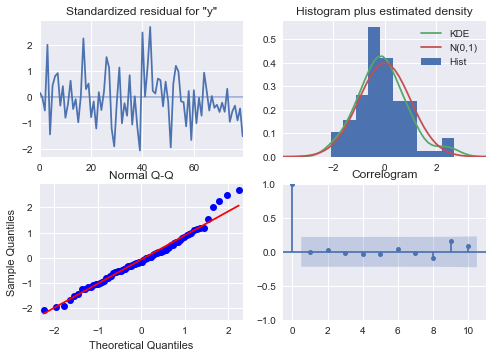

In [153]:
results_auto_SARIMA_spark.plot_diagnostics()
plt.show()

In [154]:
SARIMA_test.head()

Sparkling
YearMonth            
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

In [155]:
#pred_dynamic = results_auto_SARIMA_spark.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=True, full_results=True)
pred_dynamic = results_auto_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [156]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_spark = results_auto_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.05)

In [157]:
predicted_auto_SARIMA_spark.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1430.791480  431.172743     585.708433    2275.874526
1  1540.574479  458.383035     642.160239    2438.988718
2  1707.861319  460.154837     805.974411    2609.748227
3  1859.150183  466.712246     944.410989    2773.889377
4  1501.984520  467.013568     586.654746    2417.314293

In [158]:
# Extract the predicted and true values of our time series
spark_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_forecasted'] = predicted_auto_SARIMA_spark.predicted_mean
SARIMA_test.head()

Sparkling  spark_forecasted
YearMonth                              
1991-01-31       1902       1430.791480
1991-02-28       2049       1540.574479
1991-03-31       1874       1707.861319
1991-04-30       1279       1859.150183
1991-05-31       1432       1501.984520

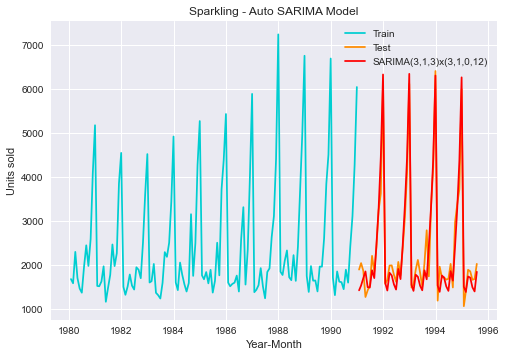

In [159]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_forecasted'], color='red', label='SARIMA(3,1,3)x(3,1,0,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Sparkling - Auto SARIMA Model')
plt.legend(loc='best')

In [160]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 331.586 and MAPE is 10.33


In [161]:
resultsDf_8_spark1 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Auto SARIMA(3,1,3)x(3,1,0,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark1])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.00                         1316.035487      45.47
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
TES Alpha 0.15, Beta 0.00, Gamma 0.37   469.767970      16.40
Auto SARIMA(3,1,3)x(3,1,0,12)           331.586044      10.33

In [ ]:
#AUTO SARIMA on Log(Sparkling)

In [162]:
spark_log_train = np.log10(SARIMA_train['Sparkling'])

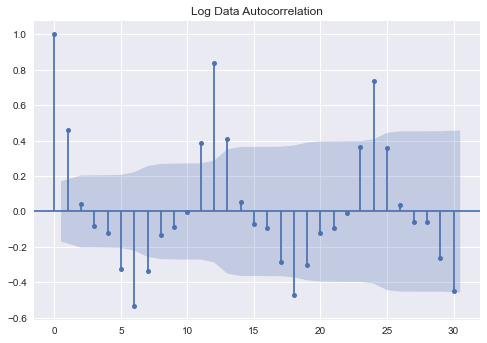

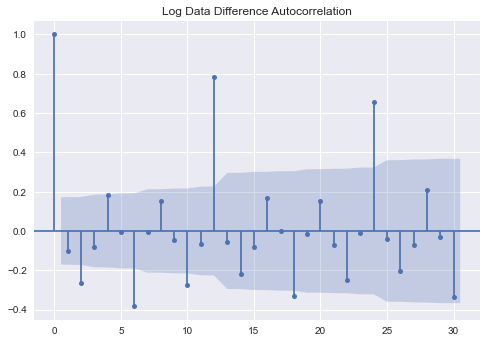

In [163]:
plot_acf(spark_log_train,lags=30,title='Log Data Autocorrelation')
plot_acf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Autocorrelation')
plt.show()

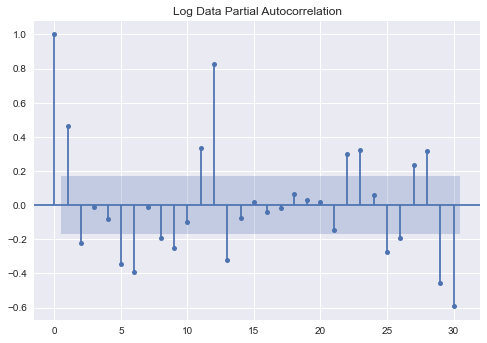

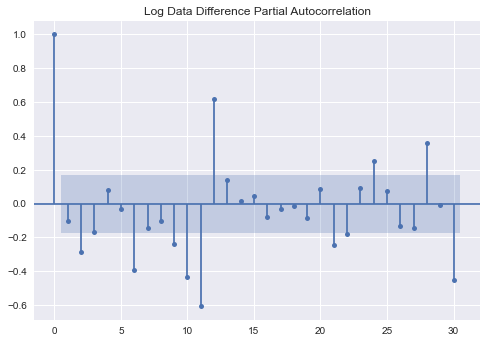

In [164]:
plot_pacf(spark_log_train,lags=30,title='Log Data Partial Autocorrelation')
plot_pacf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Partial Autocorrelation')
plt.show()

In [165]:
import itertools
p = q = range(0, 3) 
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [166]:
SARIMA_AIC_spark_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [167]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,#train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark_log = SARIMA_model_spark_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark_log.aic))
        SARIMA_AIC_spark_log = SARIMA_AIC_spark_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark_log.aic}, ignore_index=True)


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWar

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:-57.22316326227245
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:-122.81829469978429
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:-137.07304219597538
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:-209.91064502657775
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:-205.210408069403


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWar

SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:-175.11378237935855
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:-217.95527734168542
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:-225.1904718295891


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: Val

SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:-197.4132854244058
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:-200.40913589961724
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:-196.67576097043738


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWar

SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:-173.2889255288647
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:-201.15491722200653


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: Val

SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:-199.30580283357406


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:-198.5990030923874
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:-177.22797543082524


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:-175.23566708682182


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:-170.87276488390745
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:-57.79216893671347


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:-122.2326070660342


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:-138.43622711589737
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:-256.1029419320547


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:-253.58476264081537


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:-218.5589679327731
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:-261.54687848471957


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:-284.47203187421314


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:-244.46391677561462


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:-248.2081754640379


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:-247.0111769559914


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:-217.7269631567885


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:-246.5064257606261


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:-250.67711474282697


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:-245.2776469808258


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:-220.45389838672978


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:-218.54808659818502


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:-211.89407651528654
SARIMA(0, 1, 2)x(0, 0, 0, 12)7 - AIC:-87.16430408122135


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 0, 1, 12)7 - AIC:-153.63447365256425


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 0, 2, 12)7 - AIC:-164.74663624983233


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC:-259.921397215869


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 1, 1, 12)7 - AIC:-249.20890370886832


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(0, 1, 2, 12)7 - AIC:-218.57705307366584
SARIMA(0, 1, 2)x(1, 0, 0, 12)7 - AIC:-266.23765233114244


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 0, 1, 12)7 - AIC:-281.5679958424323


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 0, 2, 12)7 - AIC:-239.86560501422076


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 1, 0, 12)7 - AIC:-248.01090541568686


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 1, 1, 12)7 - AIC:-242.46916471597063


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(1, 1, 2, 12)7 - AIC:-217.11584570092143


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 0, 12)7 - AIC:-247.0455535406909


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 1, 12)7 - AIC:-248.95185404207763


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 0, 2, 12)7 - AIC:-241.81109096353714


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 1, 0, 12)7 - AIC:-219.96258330899653


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 1, 1, 12)7 - AIC:-217.9804455206845


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 2)x(2, 1, 2, 12)7 - AIC:-213.24053698062653
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AIC:-56.62659251170257
SARIMA(1, 1, 0)x(0, 0, 1, 12)7 - AIC:-122.23327149956572


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWar

SARIMA(1, 1, 0)x(0, 0, 2, 12)7 - AIC:-137.1230594091702
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:-224.9583452104442


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:-223.18645138836575


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(0, 1, 2, 12)7 - AIC:-189.47871198276567
SARIMA(1, 1, 0)x(1, 0, 0, 12)7 - AIC:-228.63007854811255


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 0, 1, 12)7 - AIC:-249.9994816016


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 0, 2, 12)7 - AIC:-214.3002157254157
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:-213.86263432375816


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:-216.48481538066196


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 1, 2, 12)7 - AIC:-188.43343775015046


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 0, 0, 12)7 - AIC:-213.36893557697437


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 0, 1, 12)7 - AIC:-214.34261657475258


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 0, 2, 12)7 - AIC:-215.10138454890057


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: Val

SARIMA(1, 1, 0)x(2, 1, 0, 12)7 - AIC:-189.15129963845416
SARIMA(1, 1, 0)x(2, 1, 1, 12)7 - AIC:-187.38242987244845


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(2, 1, 2, 12)7 - AIC:-185.46983502560522
SARIMA(1, 1, 1)x(0, 0, 0, 12)7 - AIC:-85.03639777159053


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 0, 1, 12)7 - AIC:-149.54590383242117


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 0, 2, 12)7 - AIC:-162.40934282521698
SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:-259.55710798081964


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:-252.282915052894


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 1, 2, 12)7 - AIC:-217.36137969522957
SARIMA(1, 1, 1)x(1, 0, 0, 12)7 - AIC:-262.83785076868736


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 0, 1, 12)7 - AIC:-282.51733487149176


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 0, 2, 12)7 - AIC:-242.9573753373242


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:-245.2801205361509


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:-245.47599240485658


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 1, 2, 12)7 - AIC:-216.42210355753895


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 0, 12)7 - AIC:-243.35313327941049


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 1, 12)7 - AIC:-245.3300238691395


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 0, 2, 12)7 - AIC:-243.80122677502726


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 1, 0, 12)7 - AIC:-217.23881330581443


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 1, 1, 12)7 - AIC:-215.26243372850854


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(2, 1, 2, 12)7 - AIC:-210.7663554538234
SARIMA(1, 1, 2)x(0, 0, 0, 12)7 - AIC:-87.29031322763865


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 0, 1, 12)7 - AIC:-152.23666286179034


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 0, 2, 12)7 - AIC:-162.9956416852873


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 1, 0, 12)7 - AIC:-257.95070572034683


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 1, 1, 12)7 - AIC:-248.10669892538004


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(0, 1, 2, 12)7 - AIC:-217.83615478398744


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 0, 12)7 - AIC:-263.87479226685883


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 1, 12)7 - AIC:-279.6117231917812


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 0, 2, 12)7 - AIC:-241.4019858853398
SARIMA(1, 1, 2)x(1, 1, 0, 12)7 - AIC:-244.06388395483353


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 1, 1, 12)7 - AIC:-242.33302812331738


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(1, 1, 2, 12)7 - AIC:-216.13566496133367


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 0, 0, 12)7 - AIC:-242.3733259921503


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 0, 1, 12)7 - AIC:-246.015196059328


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 0, 2, 12)7 - AIC:-240.85862542952043


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 1, 0, 12)7 - AIC:-216.27722407570369


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 1, 1, 12)7 - AIC:-214.39030680011805


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 2)x(2, 1, 2, 12)7 - AIC:-212.14297864487312
SARIMA(2, 1, 0)x(0, 0, 0, 12)7 - AIC:-64.4876489717416
SARIMA(2, 1, 0)x(0, 0, 1, 12)7 - AIC:-132.5965756174084

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(0, 0, 2, 12)7 - AIC:-146.20195902428588
SARIMA(2, 1, 0)x(0, 1, 0, 12)7 - AIC:-232.9842325169088


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(0, 1, 1, 12)7 - AIC:-235.64046355493025


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(0, 1, 2, 12)7 - AIC:-200.49406069513398
SARIMA(2, 1, 0)x(1, 0, 0, 12)7 - AIC:-235.3092512666987


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 0, 1, 12)7 - AIC:-260.82997639826044


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 0, 2, 12)7 - AIC:-225.63629607749132


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 1, 0, 12)7 - AIC:-222.1830879434221


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 1, 1, 12)7 - AIC:-225.26416922753523


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(1, 1, 2, 12)7 - AIC:-199.46694268736456


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 0, 0, 12)7 - AIC:-220.7697095555086


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 0, 1, 12)7 - AIC:-223.23027012861706


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 0, 2, 12)7 - AIC:-224.34361809396947


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 1, 0, 12)7 - AIC:-198.80917390266399


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 1, 1, 12)7 - AIC:-196.83111563702198


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 0)x(2, 1, 2, 12)7 - AIC:-194.94138568647045
SARIMA(2, 1, 1)x(0, 0, 0, 12)7 - AIC:-88.27946166239192


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 0, 1, 12)7 - AIC:-154.38039852164889


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:-166.23127818532328
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:-257.70150362610127

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:-250.3725486244652


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:-215.46644290033868


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:-257.7908745012114


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:-278.28822709804945


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:-241.07884595267552


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:-240.3509155245406


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:-243.47779356872482


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:-214.68148621969996


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:-238.959530969372


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:-240.7471211175927


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:-242.0511468836619


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:-212.29558342952512


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:-210.33407417595896


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:-208.79632872991314


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:-96.13368007525384


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:-150.71504670048859


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:-161.94168136945538


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:-258.60373962173014


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:-246.59665383282623


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:-215.89805700701663


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:-261.3087475523428


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:-277.8169142546075


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:-239.40945219373157


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:-239.33412014820843


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:-240.34985356903923


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:-214.22802938497853


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:-236.9603266840349


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:-241.65360077454204


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:-238.10206186008378


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:-211.45849673426605


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:-209.49383077351325


C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:-210.14878015838872


In [168]:
SARIMA_AIC_spark_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
25   (0, 1, 1)  (1, 0, 1, 12) -284.472032
79   (1, 1, 1)  (1, 0, 1, 12) -282.517335
43   (0, 1, 2)  (1, 0, 1, 12) -281.567996
97   (1, 1, 2)  (1, 0, 1, 12) -279.611723
133  (2, 1, 1)  (1, 0, 1, 12) -278.288227

In [169]:
import statsmodels.api as sm

auto_SARIMA_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark_log = auto_SARIMA_spark_log.fit(maxiter=1000)
print(results_auto_SARIMA_spark_log.summary())

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 146.236
Date:                            Tue, 18 Jan 2022   AIC                           -284.472
Time:                                    20:15:14   BIC                           -273.423
Sample:                                01-31-1980   HQIC                          -279.986
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8966      0.045    -19.861      0.000      -0.985      -0.808
ar.S.L12       1.0112      0.020   

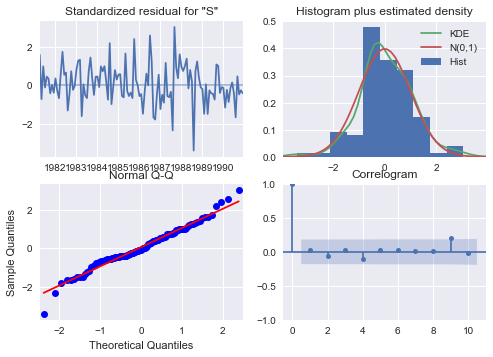

In [170]:
results_auto_SARIMA_spark_log.plot_diagnostics()
plt.show()

In [ ]:
#Predict on the Test Set using this model

In [171]:
SARIMA_test.head()

Sparkling  spark_forecasted
YearMonth                              
1991-01-31       1902       1430.791480
1991-02-28       2049       1540.574479
1991-03-31       1874       1707.861319
1991-04-30       1279       1859.150183
1991-05-31       1432       1501.984520

In [172]:
#pred_dynamic = results_auto_SARIMA_spark_log.get_prediction(start=pd.to_datetime('1991-01-31'), dynamic=True, full_results=True)
pred_dynamic = results_auto_SARIMA_spark_log.get_prediction(dynamic=True, full_results=True)

In [173]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_spark_log = results_auto_SARIMA_spark_log.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.1)

In [174]:
predicted_auto_SARIMA_spark_log.summary_frame(alpha=0.05).head()

Sparkling       mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  3.212033  0.067109       3.080501       3.343564
1991-02-28  3.141303  0.067466       3.009073       3.273534
1991-03-31  3.256285  0.067822       3.123357       3.389213
1991-04-30  3.226729  0.068176       3.093107       3.360351
1991-05-31  3.195788  0.068528       3.061476       3.330100

In [175]:
# Extract the predicted and true values of our time series
spark_log_forecasted = pred_dynamic.predicted_mean
#we need to change the scale of the logarithmic scale to the original scale by raising the predicted values
#to the power of 10
SARIMA_test['spark_log_forecasted'] = np.power(10, predicted_auto_SARIMA_spark_log.predicted_mean)
SARIMA_test.head()

Sparkling  spark_forecasted  spark_log_forecasted
YearMonth                                                    
1991-01-31       1902       1430.791480           1629.418186
1991-02-28       2049       1540.574479           1384.532399
1991-03-31       1874       1707.861319           1804.202164
1991-04-30       1279       1859.150183           1685.500780
1991-05-31       1432       1501.984520           1569.595887

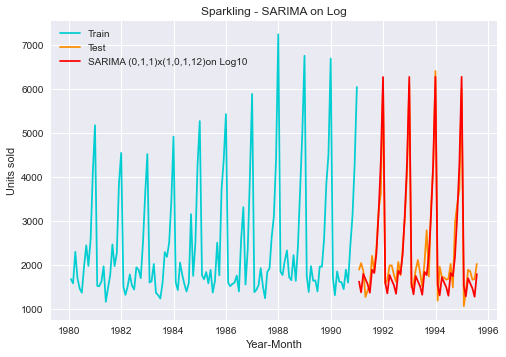

In [176]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_log_forecasted'], color='red', label='SARIMA (0,1,1)x(1,0,1,12)on Log10')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - SARIMA on Log')
plt.legend(loc='best')

In [177]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_log_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_log_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 336.796 and MAPE is 11.18


In [178]:
resultsDf_8_spark2 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Auto SARIMA(0,1,1)x(1,0,1,12)-Log10'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark2])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.00                         1316.035487      45.47
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
TES Alpha 0.15, Beta 0.00, Gamma 0.37   469.767970      16.40
Auto SARIMA(3,1,3)x(3,1,0,12)           331.586044      10.33
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.795755      11.18

In [ ]:
#Manual SARIMA
#Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.
#Let us look at the ACF and the PACF plots once more.

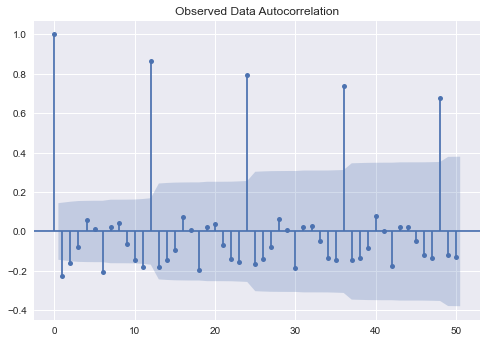

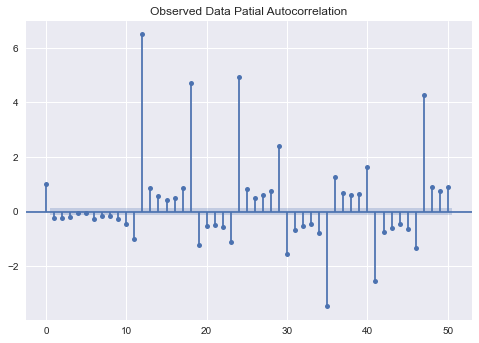

In [179]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Observed Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Observed Data Patial Autocorrelation')
plt.show()

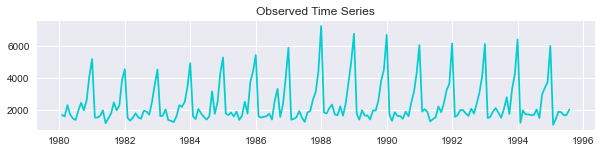

In [180]:
plt.figure(figsize=(10,2))
plt.plot(df['Sparkling'], color = 'darkturquoise')
plt.title ('Observed Time Series');

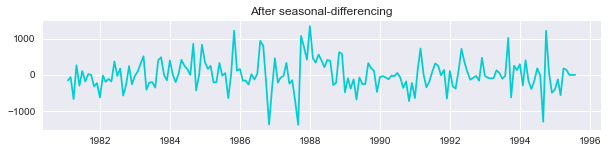

In [181]:
plt.figure(figsize=(10,2))
plt.plot(df['Sparkling'].diff(12).dropna(), color = 'darkturquoise')
plt.title ('After seasonal-differencing');

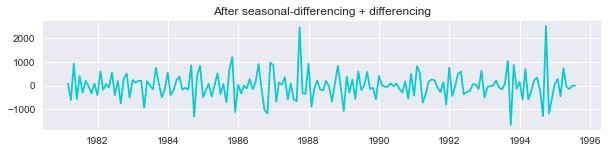

In [182]:
plt.figure(figsize=(10,2))
plt.plot((df['Sparkling'].diff(12).dropna()).diff().dropna(),  color = 'darkturquoise')
plt.title ('After seasonal-differencing + differencing');

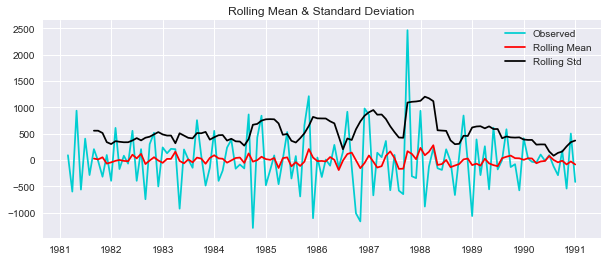

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [183]:
plt.figure(figsize=(10,4))
test_stationarity((SARIMA_train['Sparkling'].diff(12).dropna()).diff().dropna(), 'darkturquoise')

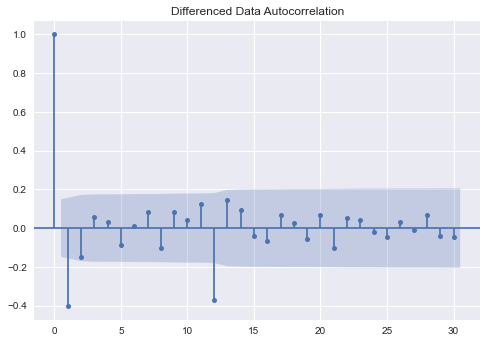

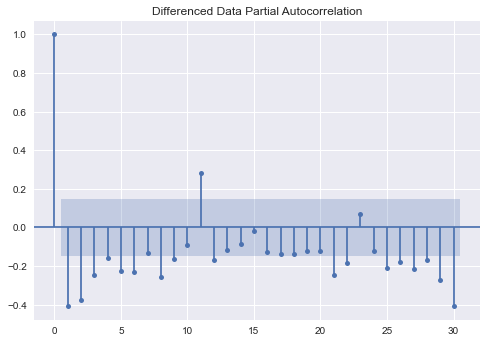

In [184]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Autocorrelation')
plot_pacf((df['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Partial Autocorrelation');

In [185]:
import statsmodels.api as sm

manual_SARIMA_spark = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 1),#(3, 1, 1),
                                seasonal_order= (1, 1, 2, 12),#(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_spark = manual_SARIMA_spark.fit(maxiter=1000)
print(results_manual_SARIMA_spark.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -693.697
Date:                                 Tue, 18 Jan 2022   AIC                           1403.394
Time:                                         20:18:35   BIC                           1423.654
Sample:                                              0   HQIC                          1411.574
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.130      1.713      0.087      -0.032       0

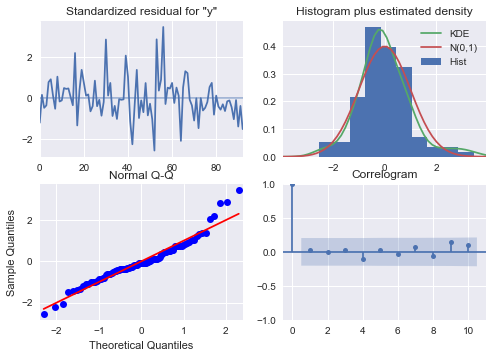

In [186]:
results_manual_SARIMA_spark.plot_diagnostics()
plt.show()

In [187]:
pred_dynamic = results_manual_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [188]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_spark = results_manual_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.5)

In [189]:
predicted_manual_SARIMA_spark.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1579.910007  416.594424     763.399941    2396.420074
1  1419.154375  429.113818     578.106746    2260.202003
2  1868.144076  429.104459    1027.114791    2709.173361
3  1731.472129  430.973118     886.780339    2576.163919
4  1659.822533  431.906099     813.302135    2506.342931

In [190]:
# Extract the predicted and true values of our time series
spark_manual_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_manual_forecasted'] = predicted_manual_SARIMA_spark.predicted_mean
SARIMA_test.head()

Sparkling  spark_forecasted  spark_log_forecasted  \
YearMonth                                                       
1991-01-31       1902       1430.791480           1629.418186   
1991-02-28       2049       1540.574479           1384.532399   
1991-03-31       1874       1707.861319           1804.202164   
1991-04-30       1279       1859.150183           1685.500780   
1991-05-31       1432       1501.984520           1569.595887   

            spark_manual_forecasted  
YearMonth                            
1991-01-31              1579.910007  
1991-02-28              1419.154375  
1991-03-31              1868.144076  
1991-04-30              1731.472129  
1991-05-31              1659.822533

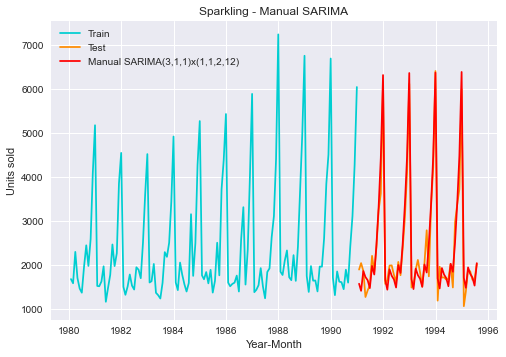

In [191]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_manual_forecasted'], color='red', label='Manual SARIMA(3,1,1)x(1,1,2,12)')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - Manual SARIMA')
plt.legend(loc='best')

In [192]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_manual_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_manual_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 324.107 and MAPE is 9.48


In [193]:
resultsDf_8_spark3 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Manual SARIMA(3,1,1)x(1,1,2,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark3])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.00                         1316.035487      45.47
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
TES Alpha 0.15, Beta 0.00, Gamma 0.37   469.767970      16.40
Auto SARIMA(3,1,3)x(3,1,0,12)           331.586044      10.33
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.795755      11.18
Manual SARIMA(3,1,1)x(1,1,2,12)         324.106737       9.48

In [ ]:
#Building the most optimum model on the Full Data.
#Sparkling
#Sort the results from all the models

In [194]:
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
Manual SARIMA(3,1,1)x(1,1,2,12)         324.106737       9.48
Auto SARIMA(3,1,3)x(3,1,0,12)           331.586044      10.33
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.795755      11.18
TES Alpha 0.15, Beta 0.00, Gamma 0.37   469.767970      16.40
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
SimpleAverage                          1275.081804      38.90
6 point TMA                            1283.927428      43.86
SES Alpha 0.00                         1316.035487      45.47
9 point TMA                            1346.278315      46.86
RegressionOnTime                       1389.135175      50.15
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
NaiveModel                             3864.279352     152.87

In [195]:
spark_resultsDf.sort_values(by=['Test MAPE'])

Test RMSE  Test MAPE
Manual SARIMA(3,1,1)x(1,1,2,12)         324.106737       9.48
Auto SARIMA(3,1,3)x(3,1,0,12)           331.586044      10.33
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.533374      10.41
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.795755      11.18
TES Alpha 0.15, Beta 0.00, Gamma 0.37   469.767970      16.40
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
SimpleAverage                          1275.081804      38.90
6 point TMA                            1283.927428      43.86
SES Alpha 0.00                         1316.035487      45.47
9 point TMA                            1346.278315      46.86
RegressionOnTime                       1389.135175      50.15
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
NaiveModel                             3864.279352     152.87

In [ ]:
#Plot all the forecast

Text(0.5, 1.0, 'SPARKLING : Forecasts Vs Test Data')

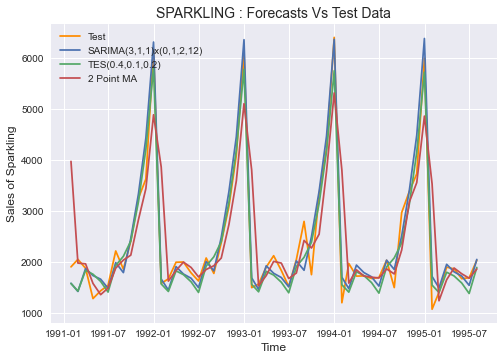

In [196]:
#plt.figure(figsize=(20,12))

#plt.plot(TES_train['Sparkling'], label='Train', color = 'purple')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

#SARIMA
plt.plot(SARIMA_test['spark_manual_forecasted'],  label='SARIMA(3,1,1)x(0,1,2,12)')
#TES
plt.plot(TES_test['predict_spark',0.4,0.1,0.2],  label='TES(0.4,0.1,0.2)')
#DES
#plt.plot(DES_test['predict_spark',0.1,0.1],  label='DES')
#SES
#plt.plot(SES_test['predict_spark'],  label='SES')
#MA
plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'],  label='2 Point MA')
#SA
#plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SA')
#Naive
#plt.plot(NaiveModel_test['spark_naive'], label='Naive')
#Regression
#plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : Forecasts Vs Test Data', fontsize=14)

In [197]:
model_TES_spark = ExponentialSmoothing(df['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_spark_fit = model_TES_spark.fit(smoothing_level=0.4,smoothing_slope=0.1,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_spark_forecast = model_TES_spark_fit.forecast(steps=12)

In [198]:
rmse_spark_tes_full = metrics.mean_squared_error(df['Sparkling'],model_TES_spark_fit.fittedvalues,squared=False)
mape_spark_tes_full = MAPE(df['Sparkling'],model_TES_spark_fit.fittedvalues)
print("TES forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_tes_full, mape_spark_tes_full))

TES forecast on the Sparkling Full Data:  RMSE is 377.290 and MAPE is 11.36


Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast using TES Model')

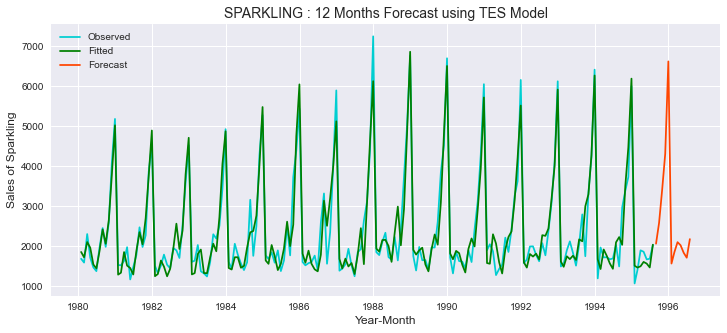

In [199]:
plt.figure(figsize=(12,5))

plt.plot(df['Sparkling'], label='Observed', color = 'darkturquoise')
plt.plot(model_TES_spark_fit.fittedvalues, label='Fitted', color = 'green')
plt.plot(TES_spark_forecast, label='Forecast', color = 'orangered')
plt.legend(loc='upper left')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using TES Model', fontsize=14)

Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

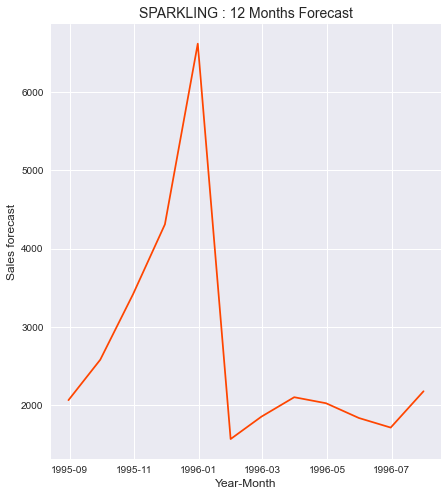

In [200]:
plt.figure(figsize=(7,8))
plt.plot(TES_spark_forecast, label='Forecast', color = 'orangered')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast', fontsize=14)

In [ ]:
#Attempt SARIMA(3,1,1)x(1,1,2,12) for forecast

In [201]:
spark_full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_spark = spark_full_data_model.fit(maxiter=1000)
print(results_full_data_model_spark.summary())

C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Mishika Raj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1078.437
Date:                                 Tue, 18 Jan 2022   AIC                           2176.875
Time:                                         21:01:44   BIC                           2206.711
Sample:                                     01-31-1980   HQIC                          2188.998
                                          - 07-31-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4230      0.086     -4.914      0.000      -0.592      -0

In [203]:
rcParams['figure.figsize'] = 14,7

NameError: name 'rcParams' is not defined

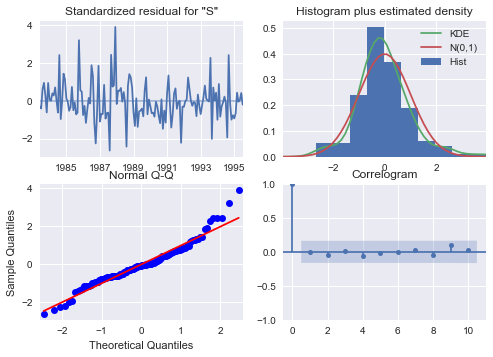

In [204]:
results_full_data_model_spark.plot_diagnostics();

In [205]:
predicted_spark_SARIMA_full_data = results_full_data_model_spark.get_forecast(steps=12)

In [206]:
predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1873.386261  384.579457    1119.624376    2627.148146
1995-09-30  2444.939414  389.595143    1681.346965    3208.531863
1995-10-31  3312.598542  390.289899    2547.644396    4077.552688
1995-11-30  3994.605734  390.800156    3228.651503    4760.559964
1995-12-31  6084.081330  390.931195    5317.870268    6850.292392

In [207]:
rmse_spark_sarima_full = metrics.mean_squared_error(df['Sparkling'],results_full_data_model_spark.fittedvalues,squared=False)
mape_spark_sarima_full = MAPE(df['Sparkling'],results_full_data_model_spark.fittedvalues)
print("For SARIMA forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_sarima_full, mape_spark_sarima_full))

For SARIMA forecast on the Sparkling Full Data:  RMSE is 591.255 and MAPE is 14.86


In [208]:
df.tail()

Sparkling
YearMonth            
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [209]:
pred_full_manual_SARIMA_date = predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))


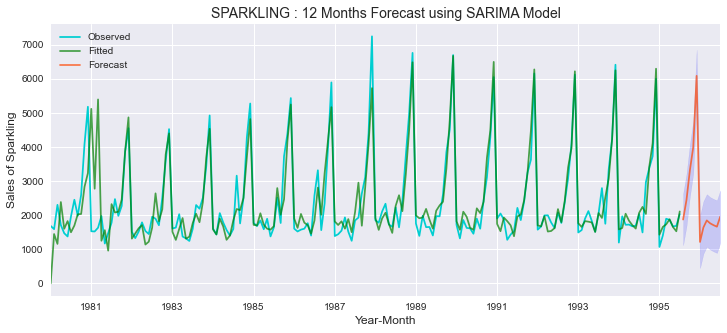

In [210]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,5))

axis = df['Sparkling'].plot(label='Observed', color = 'darkturquoise')
results_full_data_model_spark.fittedvalues.plot(ax=axis, label='Fitted', alpha=0.7, color = 'green')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

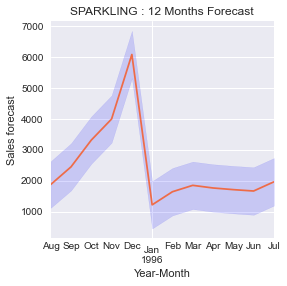

In [211]:
plt.figure(figsize=(4,4))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('SPARKLING : 12 Months Forecast', fontsize=12)

In [212]:
forecast = pd.DataFrame({'Sparkling':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast

Sparkling
1995-08-31    1873.39
1995-09-30    2444.94
1995-10-31    3312.60
1995-11-30    3994.61
1995-12-31    6084.08
1996-01-31    1215.91
1996-02-29    1640.57
1996-03-31    1847.28
1996-04-30    1761.99
1996-05-31    1708.30
1996-06-30    1664.02
1996-07-31    1961.28

In [213]:
forecast.describe()

Sparkling
count    12.000000
mean   2459.080833
std    1384.638657
min    1215.910000
25%    1697.230000
50%    1860.335000
75%    2661.855000
max    6084.080000